# Inteligencia Artoificial - Proyecto parcial 1
### Juan Angel Candelaria Rodriguez 653728

Este proyecto tiene como finalidad predecir la temperatura de equilibrio de un planeta en referencia a la tierra para determinar si puede ser potencialmente habitable.

#Predicción de la Temperatura de Equilibrio de Exoplanetas
## ¿Qué tan parecido a la Tierra puede ser un planeta fuera de nuestro sistema solar?

**Inteligencia Artificial | Universidad de Monterrey**  
**Proyecto Final – Unidad 1: Modelos de Regresión**

---
#Planteamiento del Problema y Contexto de los Datos

### Contexto


Este enfoque de predicción de habitabilidad de un exoplaneta tiene una justificación un poco mas personal, ya que siempre me ha gustado mucho el espacio y todo lo relacionado con las estrellas, la vida en otros planetas, etc.

Partiendo de esto, siempre ha sido una curiosidad intrinseca de la humanidad el saber que hay mas afuera, conforme ha avanzado la tecnologia, cada vez hemos sido mas capaces de buscar cuerpos celestes, y catalogarlos en comparación a nuestro planeta tierra. Asi mismo, una de las principales preguntas de la comunidad cientifica, ha sido que planeta es potencialmente habitable para nosotros los humanos, esto debido a factores como el deterioro del medio ambiente, sobrepoblacion, entre otras cosas. La busqueda de otro planeta que pueda albergar vida, esta a expensas de lo similar que sea ese planeta a la tierra, ya que nos hemos desarrollado en las condiciones que este provee, de modo que un enfoque seria buscar un lugar similar en el extenso universo conocido.

La búsqueda de un mundo similar al nuestro no es arbitraria — nos hemos desarrollado bajo condiciones muy específicas, de modo que el punto de partida más natural es buscar planetas que compartan esas mismas condiciones. Entre todos los factores que definen si un planeta puede albergar vida, la temperatura de equilibrio destaca como un indicador integrador: refleja directamente la cantidad de energía que recibe un planeta de su estrella, y está físicamente determinada por características que sí podemos observar a distancia. Por ello, prestaremos especial atención a las variables `st_teff` (temperatura efectiva de la estrella), `st_rad` (radio estelar), `pl_orbsmax` (semieje mayor orbital), `pl_insol` (insolación recibida) y `pl_orbeccen` (excentricidad orbital), entre otros; ya que son los parámetros que, tanto físicamente como en la literatura científica, gobiernan directamente el valor de `pl_eqt`.

La temperatura de equilibrio de la **Tierra es aproximadamente 255 K** (-18°C).

Los planetas cuya temperatura de equilibrio se encuentra en el rango de ~200 K a 320 K se consideran térmicamente compatibles con la existencia de agua líquida y, por tanto, candidatos a ser habitables. Obviamente también hay más variables que pueden influir, como la masa del planeta, si es rocoso, si está en la zona habitable con respecto a su estrella más cercana, entre otros.

Sin embargo, de modo que estos factores que pueden determinar la habitabilidad estan relacionados entre si, de modo que la temperatura seria un buen enfoque para este contexto.

### Pregunta de Investigación

> *¿Qué características de un planeta permiten predecir qué tan similar es la temperatura de equilibrio de un exoplaneta a la de la Tierra, y qué planetas se encuentran dentro del rango compatible con la habitabilidad?*

### Variable de salida

Para hacer la predicción interpretable en términos terrestres, utilizaremos una variable llamada **Temperatura de Equilibrio (pl_eqt)**, el cual estara medido en Kelvin:

$$\text{pl_eqt}$$

De modo que este indice nos podria decir lo siguiente:
- Un valor cercano a 255 K indica que el planeta tiene una temperatura de equilibrio que la Tierra.
- Un valor < 255 K indica un planeta más frío que la Tierra.
- Un valor de > 255 K indica un planeta más caliente que la Tierra.

### Fuentes

Los datos fueron recopilados del **NASA Exoplanet Archive** (https://exoplanetarchive.ipac.caltech.edu), el repositorio oficial de la NASA para datos de exoplanetas confirmados. El archivo utilizado es el **Planetary Systems Composite Parameters** (PSCompPars), descargado de la pagina oficial de la NASA.

Este dataset esta conformado por multiples mediciones para cada planeta avistado, observaciones de múltiples telescopios y misiones espaciales, incluyendo Kepler, K2, TESS y observatorios terrestres.

### Justificación

La elección de un enfoque de regresión tiene sentido por varias razones. Primero, pl_eqt es una variable continua y cuantitativa, no una categoría de sí o no. Además, existe una relación física ya conocida entre las características de la estrella, la órbita y la temperatura del planeta. La idea no es etiquetar planetas como habitables o no habitables, sino cuantificar qué tan cerca está cada uno del perfil térmico de la Tierra, que es esencialmente un problema de predicción.


## Metodologia
- Carga y Exploracion de Datos: explorar la cantidad de observaciones, escalas y variables que tenemos
- Preparacion y Limpieza: limpiar datos, llenar huecos, identificar outliers.
- Analisis de posibles relaciones entre variables: analisis mediante matriz de correlacion e interpretacion
- Selección de caracteristicas: seleccion de variables que aportan y cuales no
- Construccion y comparación de modelos
- Evaluacion de desempeño de modelos
Analisis de inferencia y conclusiones

In [3]:
# importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import scipy.stats as stats


# Cargar base de datos

In [6]:
# cargar datos

from google.colab import drive
drive.mount('/content/drive')
# ruta
df_raw = pd.read_csv('/content/drive/MyDrive/Inteligencia_Artificial_1/Proyecto 1/PSCompPars_2026.02.16_14.28.02.csv', comment='#')
df_raw

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,...,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007.0,Xinglong Station,0,323.210000,0.060000,-0.050000,0.0,1.178000,0.000000e+00,0.000000e+00,0.0,12.2,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4914.898486,39.092894,-39.728551,0.0,15.4640,0.1230,-0.1250,0.0,Msini,0.2380,0.0070,-0.0070,0.0,NaN,NaN,NaN,...,NaN,0,G8 III,4874.00,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.640,-0.630,0.0,-0.2600,0.1000,-0.1000,0.0,[Fe/H],2.450000,0.080000,-0.080000,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.92380,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009.0,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,-3.200000,0.0,1.530000,7.000000e-02,-7.000000e-02,0.0,12.3,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4684.814200,794.575000,-794.575000,0.0,14.7400,2.5000,-2.5000,0.0,Msini,0.0800,0.0300,-0.0300,0.0,NaN,NaN,NaN,...,NaN,0,K4 III,4213.00,46.00,-46.00,0.0,29.79,2.84,-2.84,0.0,2.78,0.690,-0.690,0.0,-0.0200,NaN,NaN,0.0,[Fe/H],1.930000,0.070000,-0.070000,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008.0,Okayama Astrophysical Observatory,0,186.760000,0.110000,-0.120000,0.0,0.775000,0.000000e+00,0.000000e+00,0.0,13.1,NaN,NaN,0.0,1.16,NaN,NaN,0.0,1131.151301,36.232438,-38.775066,0.0,3.5590,0.1140,-0.1220,0.0,Msini,0.0000,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,0,K0 III,4888.00,NaN,NaN,0.0,11.55,1.12,-0.51,0.0,1.78,0.430,-0.290,0.0,-0.2100,0.1000,-0.1000,0.0,[Fe/H],2.550000,0.060000,-0.070000,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.71400,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002.0,W. M. Keck Observatory,0,1765.038900,1.677090,-1.872560,0.0,2.774000,1.090000e-01,-1.200000e-01,0.0,12.6,NaN,NaN,0.0,1.12,NaN,NaN,0.0,2559.472162,518.695960,-280.642483,0.0,8.0530,1.6320,-0.8830,0.0,Mass,0.3730,0.0080,-0.0060,0.0,NaN,NaN,NaN,...,NaN,0,K0V,5338.00,25.00,-25.00,0.0,0.93,0.01,-0.01,0.0,0.91,0.113,-0.113,0.0,0.4052,0.0466,-0.0466,0.0,[Fe/H],4.450000,0.020000,-0.020000,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.00730,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996.0,Multiple Observatories,0,798.500000,1.000000,-1.000000,0.0,1.660000,3.000000e-02,-3.000000e-02,0.0,13.5,NaN,NaN,0.0,1.20,NaN,NaN,0.0,565.737400,25.426400,-25.426400,0.0,1.7800,0.0800,-0.0800,0.0,Msini,0.6800,0.0200,-0.0200,0.0,NaN,NaN,NaN,...,NaN,0,G3 V,5750.00,8.00,-8.00,0.0,1.13,0.01,-0.01,0.0,1.08,0.040,-0.040,0.0,0.0600,NaN,NaN,0.0,[Fe/H],4.360000,0.010000,-0.010000,0.0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,0.01100,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Bien, contamos con casi 6000 observaciones y 84 variables para trabajar, pero primero, pongamos algo de contexto de las variables para saber con que estamos tratando

# Diccionario de Variables — NASA Exoplanet Archive (PSCompPars)

## Identificación del Sistema

| Variable | Descripción |
|---|---|
| `pl_name` | Nombre del planeta |
| `hostname` | Nombre de la estrella anfitriona |
| `sy_snum` | Número de estrellas en el sistema |
| `sy_pnum` | Número de planetas en el sistema |

## Descubrimiento

| Variable | Descripción |
|---|---|
| `discoverymethod` | Método de descubrimiento (ej. Radial Velocity, Transit) |
| `disc_year` | Año de descubrimiento |
| `disc_facility` | Instalación/observatorio donde fue descubierto |
| `pl_controv_flag` | Bandera de planeta controvertido (1 = controvertido) |

## Parámetros Orbitales del Planeta

| Variable | Descripción |
|---|---|
| `pl_orbper` | Período orbital (días) — *La Tierra tarda 365.25 días en orbitar el Sol* |
| `pl_orbpererr1/2` | Incertidumbre superior/inferior del período orbital |
| `pl_orbperlim` | Límite del período orbital |
| `pl_orbsmax` | Semieje mayor de la órbita en Unidades Astronómicas (UA) — *1 UA = distancia Tierra-Sol ≈ 150 millones de km* |
| `pl_orbsmaxerr1/2` | Incertidumbre del semieje mayor |
| `pl_orbsmaxlim` | Límite del semieje mayor |
| `pl_orbeccen` | Excentricidad orbital — *0 = órbita perfectamente circular; 1 = órbita parabólica (escape). La Tierra tiene ~0.017* |
| `pl_orbeccenerr1/2` | Incertidumbre de la excentricidad |
| `pl_orbeccenlim` | Límite de excentricidad |

## Radio del Planeta

| Variable | Descripción |
|---|---|
| `pl_rade` | Radio del planeta en radios terrestres (R⊕) — *1 R⊕ = 6,371 km (radio de la Tierra)* |
| `pl_radeerr1/2` | Incertidumbre del radio en R⊕ |
| `pl_radelim` | Límite del radio en R⊕ |
| `pl_radj` | Radio del planeta en radios de Júpiter (RJ) — *1 RJ = 71,492 km ≈ 11.2 R⊕* |
| `pl_radjerr1/2` | Incertidumbre del radio en RJ |
| `pl_radjlim` | Límite del radio en RJ |

## Masa del Planeta

| Variable | Descripción |
|---|---|
| `pl_bmasse` | Masa del planeta en masas terrestres (M⊕) — *1 M⊕ = 5.97 × 10²⁴ kg* |
| `pl_bmasseerr1/2` | Incertidumbre de la masa en M⊕ |
| `pl_bmasselim` | Límite de la masa en M⊕ |
| `pl_bmassj` | Masa del planeta en masas de Júpiter (MJ) — *1 MJ = 1,898 × 10²⁷ kg ≈ 318 M⊕* |
| `pl_bmassjerr1/2` | Incertidumbre de la masa en MJ |
| `pl_bmassjlim` | Límite de la masa en MJ |
| `pl_bmassprov` | Fuente de la masa (ej. `Msini` = masa mínima proyectada, `Mass` = masa real estimada) |

## Otras Propiedades del Planeta

| Variable | Descripción |
|---|---|
| `pl_insol` | Insolación recibida por el planeta relativa a la Tierra — *1 = misma radiación que recibe la Tierra. Venus recibe ~1.9, Marte ~0.43* |
| `pl_insolerr1/2` | Incertidumbre de la insolación |
| `pl_insollim` | Límite de insolación |
| `pl_eqt` | Temperatura de equilibrio del planeta (Kelvin) — *0 K = −273 °C. La Tierra tiene ~255 K (−18 °C) sin efecto invernadero. El agua líquida existe entre ~273 K y 373 K* |
| `pl_eqterr1/2` | Incertidumbre de la temperatura de equilibrio |
| `pl_eqtlim` | Límite de la temperatura de equilibrio |
| `ttv_flag` | Bandera de variaciones en el tiempo de tránsito (1 = TTV detectado; indica posible influencia gravitacional de otro planeta) |

## Propiedades de la Estrella

| Variable | Descripción |
|---|---|
| `st_spectype` | Tipo espectral de la estrella — *clasificación OBAFGKM de más caliente/masiva a más fría/pequeña. El Sol es G2* |
| `st_teff` | Temperatura efectiva de la estrella (Kelvin) — *El Sol tiene ~5,778 K. Estrellas azules superan 30,000 K; enanas rojas rondan 3,000 K* |
| `st_tefferr1/2` | Incertidumbre de la temperatura efectiva |
| `st_tefflim` | Límite de la temperatura efectiva |
| `st_rad` | Radio estelar en radios solares (R⊙) — *1 R⊙ = 696,000 km ≈ 109 radios terrestres* |
| `st_raderr1/2` | Incertidumbre del radio estelar |
| `st_radlim` | Límite del radio estelar |
| `st_mass` | Masa estelar en masas solares (M⊙) — *1 M⊙ = 1.989 × 10³⁰ kg ≈ 333,000 masas terrestres* |
| `st_masserr1/2` | Incertidumbre de la masa estelar |
| `st_masslim` | Límite de la masa estelar |
| `st_met` | Metalicidad de la estrella en dex — *mide la abundancia de elementos más pesados que el helio respecto al Sol. 0 = igual que el Sol; +0.3 = doble de metales; −0.3 = la mitad* |
| `st_meterr1/2` | Incertidumbre de la metalicidad |
| `st_metlim` | Límite de la metalicidad |
| `st_metratio` | Ratio de metalicidad utilizado (ej. `[Fe/H]` = hierro respecto al hidrógeno, el más común) |
| `st_logg` | Gravedad superficial estelar en escala logarítmica (log g, cgs) — *el Sol tiene log g ≈ 4.44. Valores altos (~4.5) indican enanas compactas; valores bajos (~2) indican gigantes* |
| `st_loggerr1/2` | Incertidumbre del log g |
| `st_logglim` | Límite del log g |

## Posición y Distancia

| Variable | Descripción |
|---|---|
| `rastr` | Ascensión recta en formato sexagesimal (horas:minutos:segundos) — *equivalente a la longitud geográfica pero en el cielo* |
| `ra` | Ascensión recta en grados decimales (0° a 360°) |
| `decstr` | Declinación en formato sexagesimal — *equivalente a la latitud geográfica en el cielo (−90° a +90°)* |
| `dec` | Declinación en grados decimales |
| `sy_dist` | Distancia al sistema en parsecs (pc) — *1 pc ≈ 3.26 años luz ≈ 30.9 billones de km. La estrella más cercana, Próxima Centauri, está a ~1.3 pc* |
| `sy_disterr1/2` | Incertidumbre de la distancia |

## Magnitudes del Sistema

| Variable | Descripción |
|---|---|
| `sy_vmag` | Magnitud aparente en banda V (luz visible) — *escala invertida: menor valor = más brillante. El Sol tiene −26.7; ojo humano ve hasta ~+6; Júpiter ronda −2* |
| `sy_vmagerr1/2` | Incertidumbre en magnitud V |
| `sy_kmag` | Magnitud en banda K (infrarrojo cercano, ~2.2 µm) — *útil para estrellas frías y objetos con polvo interestelar* |
| `sy_kmagerr1/2` | Incertidumbre en magnitud K |
| `sy_gaiamag` | Magnitud en banda G del satélite Gaia (óptico amplio, ~330–1050 nm) — *muy precisa, usada para astrometría moderna* |
| `sy_gaiamagerr1/2` | Incertidumbre en magnitud Gaia |

---
> **Nota:** Las columnas con sufijo `err1` corresponden a la incertidumbre superior (+) y `err2` a la inferior (−). Las columnas con sufijo `lim` indican si el valor es un límite superior/inferior (1) o una medición (0).
>
> **Símbolo solar ⊙:** El círculo con una cruz representa al Sol, nuestra estrella. Se usa como unidad de referencia en variables estelares: masas solares (M⊙), radios solares (R⊙), etc.
>
> **Símbolo terrestre ⊕:** El círculo con una cruz representa al Sol, nuestra estrella. Se usa como unidad de referencia en variables estelares: masas solares (M⊕), radios solares (R⊙), etc.


Bueno, de entrada, es cierto que son demasiadas variables y muchas definiciones, pero, no nos desanimemos por eso.

Un buen acercamiento inicial seria ver si nos faltan datos en el dataset y en base a eso poder reducir un poco las dimensiones, ya que recordemos que no necesariamente debemos de tener demasiadas variables para explicar algo.

Veamos si tenemos valores faltantes para cada columna.

### Ver porcentaje de datos faltantes para cada variable


Total columnas: 84
  > 50% nulos:  9 columnas
  20–50% nulos: 12 columnas
  < 20% nulos:  63 columnas


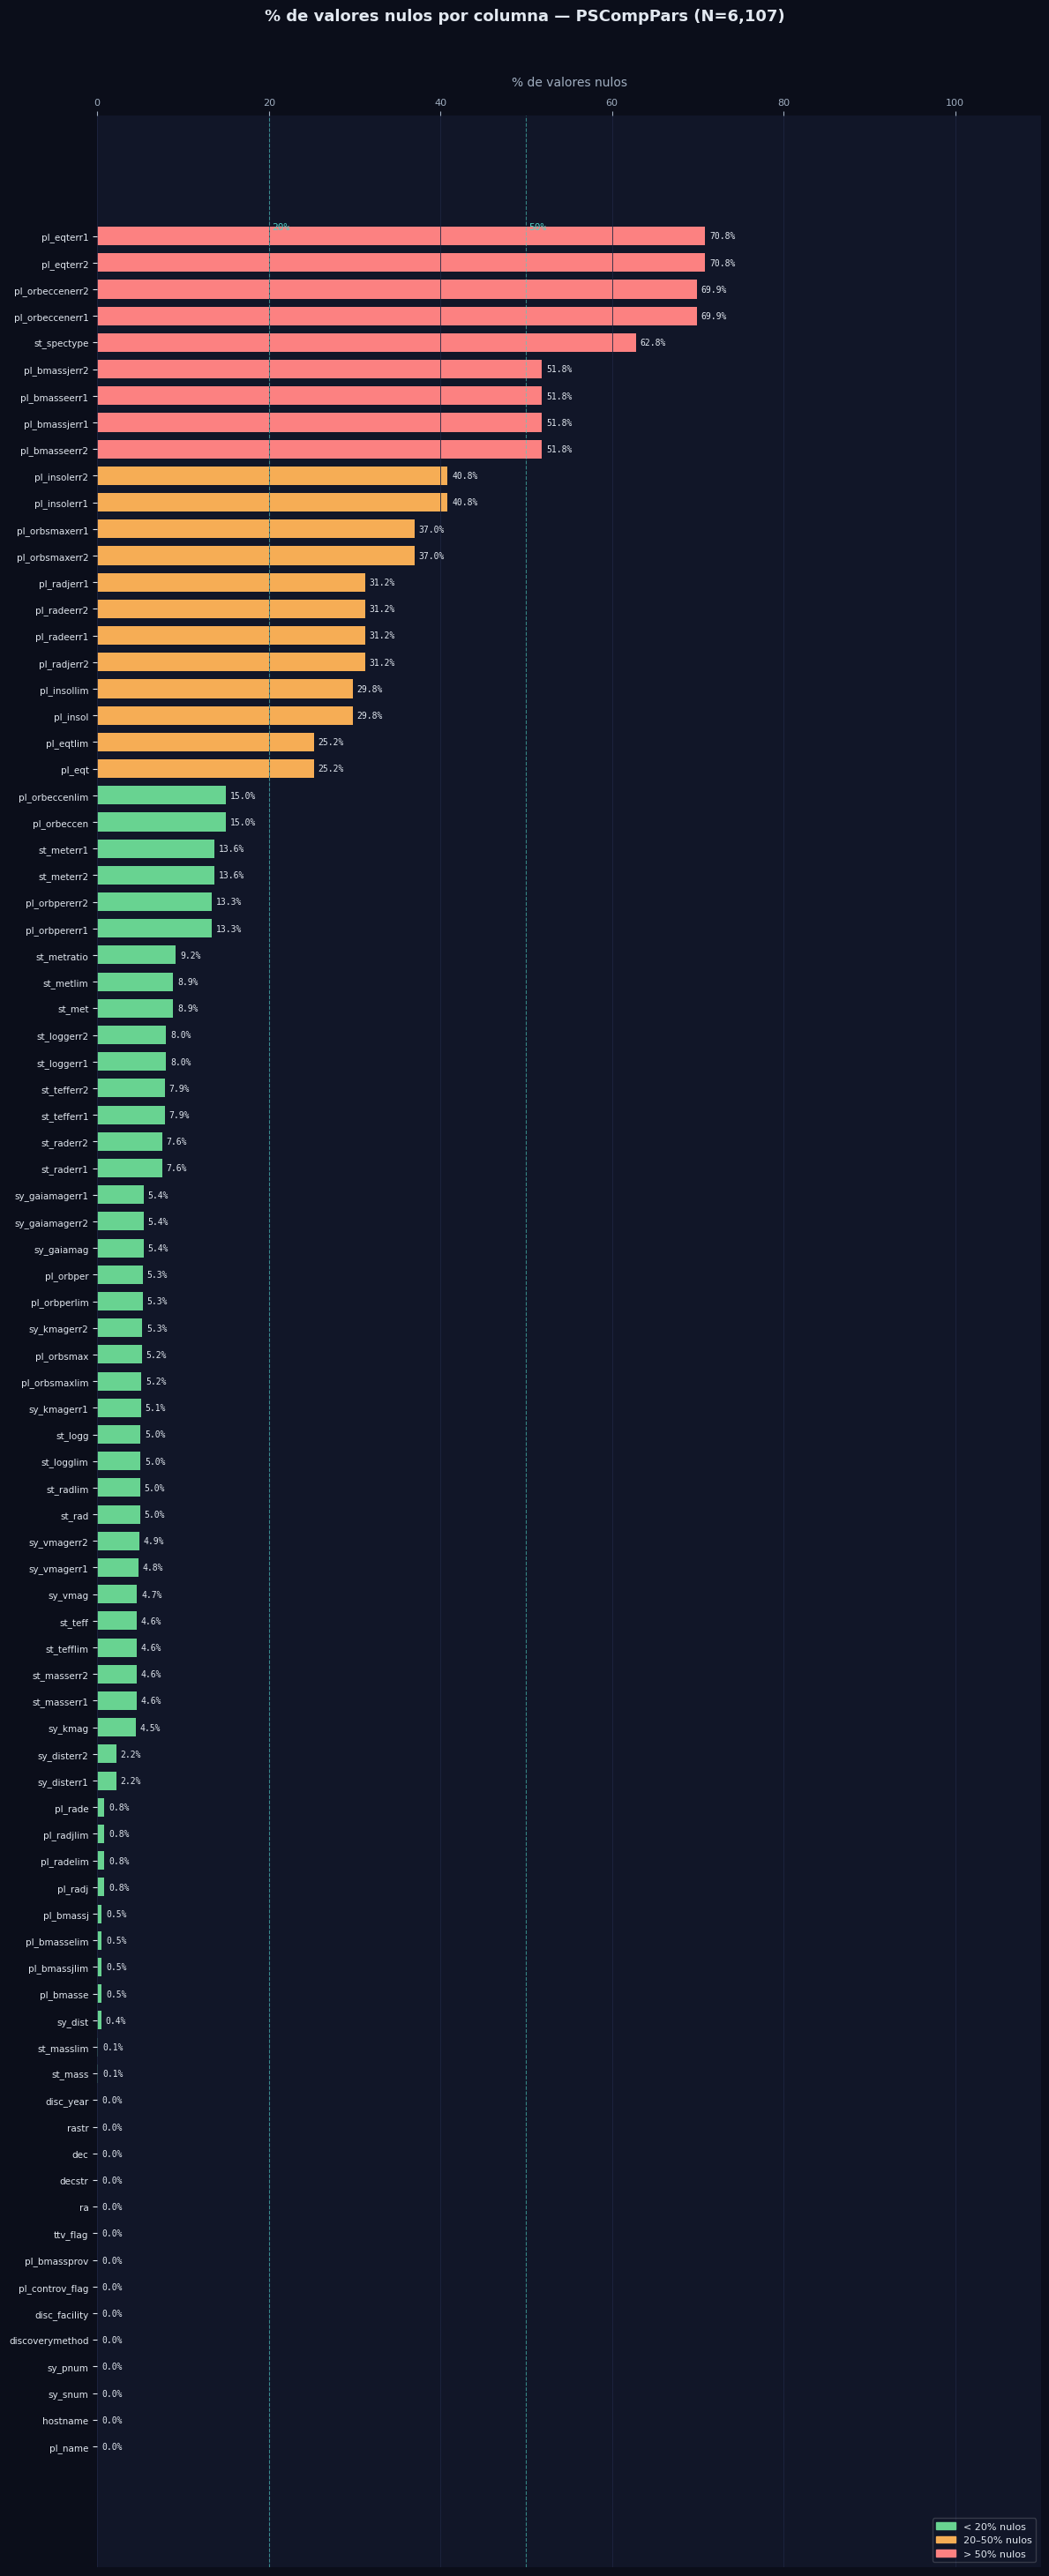

In [9]:
# ── Calcular % de nulos por columna ─────────────────────────────────────────
nulls = (df_raw.isnull().mean() * 100).sort_values(ascending=True)

# ── Color por umbral ─────────────────────────────────────────────────────────
def get_color(pct):
    if pct >= 50:
        return "#fc8181"   # rojo  — más de 50% nulos
    elif pct >= 20:
        return "#f6ad55"   # naranja — 20–50%
    else:
        return "#68d391"   # verde  — menos de 20%

colors = [get_color(p) for p in nulls.values]

# ── Figura ───────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, len(nulls) * 0.32 + 2))
fig.patch.set_facecolor("#0b0e1a")
ax.set_facecolor("#111628")

bars = ax.barh(nulls.index, nulls.values, color=colors, height=0.7, edgecolor="none")

# Etiquetas con el % al final de cada barra
for bar, val in zip(bars, nulls.values):
    ax.text(
        val + 0.5, bar.get_y() + bar.get_height() / 2,
        f"{val:.1f}%",
        va="center", ha="left",
        fontsize=7, color="#e2e8f0", fontfamily="monospace"
    )

# Líneas de referencia en 20% y 50%
for xline, label in [(20, "20%"), (50, "50%")]:
    ax.axvline(xline, color="#4fd1c5", linestyle="--", linewidth=0.8, alpha=0.6)
    ax.text(xline + 0.3, len(nulls) - 0.5, label,
            color="#4fd1c5", fontsize=8, va="top", fontfamily="monospace")

# Estilo de ejes
ax.set_xlim(0, 110)
ax.set_xlabel("% de valores nulos", color="#a0aec0", fontsize=10, labelpad=10)
ax.tick_params(axis="x", colors="#a0aec0", labelsize=8)
ax.tick_params(axis="y", colors="#e2e8f0", labelsize=7.5)
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.grid(axis="x", color="#1e2540", linewidth=0.6)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

# Título
fig.suptitle(
    "% de valores nulos por columna — PSCompPars (N=6,107)",
    color="#e2e8f0", fontsize=13, fontweight="bold", y=1.01, x=0.5
)

# Leyenda
patches = [
    mpatches.Patch(color="#68d391", label="< 20% nulos"),
    mpatches.Patch(color="#f6ad55", label="20–50% nulos"),
    mpatches.Patch(color="#fc8181", label="> 50% nulos"),
]
ax.legend(handles=patches, loc="lower right", framealpha=0.2,
          labelcolor="#e2e8f0", fontsize=8, facecolor="#111628")

plt.tight_layout()

# ── Resumen en consola ───────────────────────────────────────────────────────
print(f"\nTotal columnas: {len(nulls)}")
print(f"  > 50% nulos:  {(nulls >= 50).sum()} columnas")
print(f"  20–50% nulos: {((nulls >= 20) & (nulls < 50)).sum()} columnas")
print(f"  < 20% nulos:  {(nulls < 20).sum()} columnas")

WOW, increible grafica, con esto podemos darnos cuenta de cuantas columnas con valores faltantes tenemos, afortunadamente nuestra variable de interes, **(pl_eqt)**, solo le falta el 25% de los dato, es decir, tenemos 75% de datos que si son relevantes.

Ahora, como podemos ver, hay variables que tienen 50% de los datos faltantes o incluso hay variables con 60 a 70 % de datos faltantes, y realmente con eso no podriamos trabajar ya que solo contariamos con el 20 -30% de los datos y no seria estadisticamente confiable trabajar con ellos, por lo tanto, definiremos que las variables con un porcentaje mayor al 50% seran automaticamente descartadas.

Aunado a esto, solo 12 columnas tienen valores nulos mayores al 50%, por lo cual no representaria un riesgo si las quitamos.

### Filtrar dataset por valores faltantes por columna

In [10]:
print(f"Shape original:  {df_raw.shape}  ({df_raw.shape[1]} columnas, {df_raw.shape[0]} filas)")

# ── Identificar y eliminar columnas con más del 50% de nulos ─────────────────
umbral = 0.50
nulos_pct = df_raw.isnull().mean()
cols_eliminar = nulos_pct[nulos_pct > umbral].index.tolist()

print(f"\nColumnas eliminadas ({len(cols_eliminar)}) — más del 50% de nulos:")
for col in cols_eliminar:
    print(f"  - {col:30s}  {nulos_pct[col]*100:.1f}%")

# ── Dataset limpio ────────────────────────────────────────────────────────────
df_clean = df_raw.drop(columns=cols_eliminar)

print(f"\nShape resultante: {df_clean.shape}  ({df_clean.shape[1]} columnas, {df_clean.shape[0]} filas)")

Shape original:  (6107, 84)  (84 columnas, 6107 filas)

Columnas eliminadas (9) — más del 50% de nulos:
  - pl_bmasseerr1                   51.8%
  - pl_bmasseerr2                   51.8%
  - pl_bmassjerr1                   51.8%
  - pl_bmassjerr2                   51.8%
  - pl_orbeccenerr1                 69.9%
  - pl_orbeccenerr2                 69.9%
  - pl_eqterr1                      70.8%
  - pl_eqterr2                      70.8%
  - st_spectype                     62.8%

Shape resultante: (6107, 75)  (75 columnas, 6107 filas)


Del mismo modo, puede que haya ciertos datos atipicos, o datos que se salgan de nuestro rango intercuartil, Q3-Q1, para abarcar este problema, primero veamos algunas metricas estadisticas, minimos, maximos, para ver estos outliers, esto utlizando el metodo de tukey, donde los datos que se salgan de rango intercuartil, seran catalogados como outliers, asi mismo, veamos la cantidad de outliers por columna de la misma forma que vimos los datos faltantes.

Logicamente esto solo aplica para columnas con valores numericos, las variables categoricas, quedan excluidas para este caso.

### Verificar *outliers*

ESTADÍSTICAS DESCRIPTIVAS:
                  count          mean           std           min          25%          50%          75%           max
sy_snum          6107.0      1.103324  3.419091e-01  1.000000e+00     1.000000     1.000000     1.000000  4.000000e+00
sy_pnum          6107.0      1.771574  1.157888e+00  1.000000e+00     1.000000     1.000000     2.000000  8.000000e+00
disc_year        6106.0   2016.923354  4.925059e+00  1.992000e+03  2014.000000  2016.000000  2021.000000  2.026000e+03
pl_controv_flag  6107.0      0.007860  8.831383e-02  0.000000e+00     0.000000     0.000000     0.000000  1.000000e+00
pl_orbper        5784.0  73996.569733  5.288286e+06  9.070629e-02     4.352093    11.129002    39.729264  4.020000e+08
pl_orbpererr1    5292.0  90456.414349  6.461142e+06  0.000000e+00     0.000012     0.000086     0.001502  4.700000e+08
pl_orbpererr2    5292.0 -20661.730942  1.376695e+06 -1.000000e+08    -0.001505    -0.000087    -0.000012  0.000000e+00
pl_orbperlim     5784

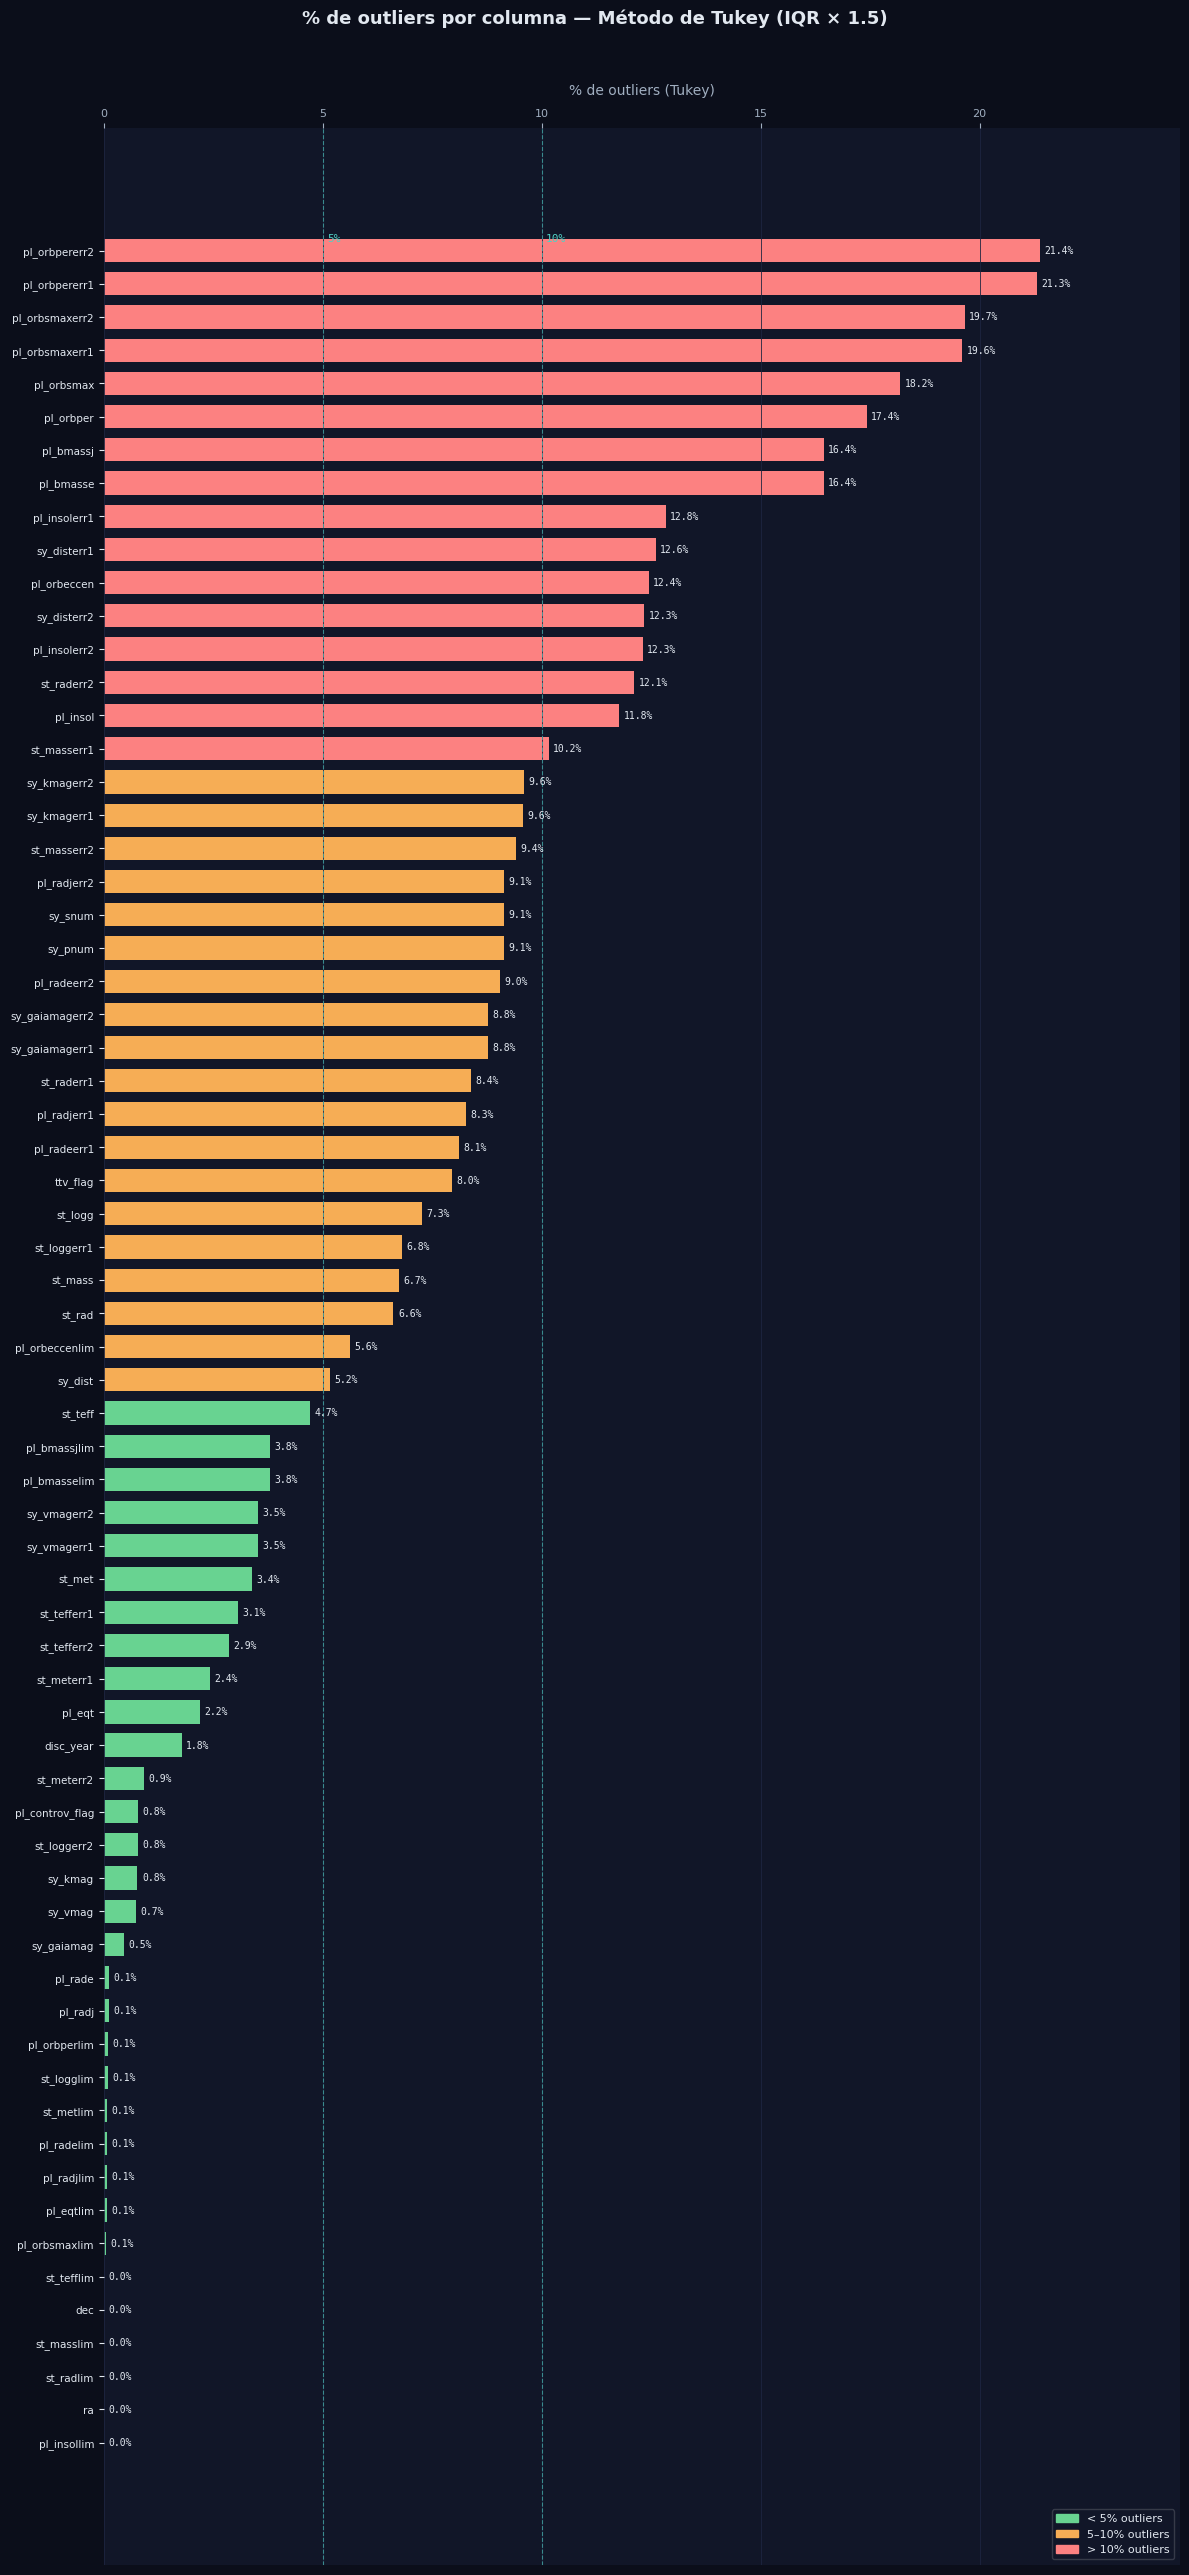


Total columnas numéricas analizadas: 67
  > 10% outliers: 16 columnas
  5–10% outliers: 19 columnas
  < 5%  outliers: 32 columnas


In [11]:
# ── Seleccionar solo columnas numéricas ──────────────────────────────────────
df_num = df_clean.select_dtypes(include="number")

# ── Estadísticas descriptivas ────────────────────────────────────────────────
print("ESTADÍSTICAS DESCRIPTIVAS:")
print(df_num.describe().T.to_string())

# ── Método de Tukey: detectar outliers por columna ──────────────────────────
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_pct = {}
for col in df_num.columns:
    mask = (df_num[col] < lower[col]) | (df_num[col] > upper[col])
    outliers_pct[col] = mask.sum() / df_num[col].notna().sum() * 100

outliers_series = pd.Series(outliers_pct).sort_values(ascending=True)

# ── Gráfica ──────────────────────────────────────────────────────────────────
def get_color(pct):
    if pct >= 10:
        return "#fc8181"
    elif pct >= 5:
        return "#f6ad55"
    else:
        return "#68d391"

colors = [get_color(p) for p in outliers_series.values]

fig, ax = plt.subplots(figsize=(12, len(outliers_series) * 0.35 + 2))
fig.patch.set_facecolor("#0b0e1a")
ax.set_facecolor("#111628")

bars = ax.barh(outliers_series.index, outliers_series.values, color=colors, height=0.7, edgecolor="none")

for bar, val in zip(bars, outliers_series.values):
    ax.text(
        val + 0.1, bar.get_y() + bar.get_height() / 2,
        f"{val:.1f}%",
        va="center", ha="left",
        fontsize=7, color="#e2e8f0", fontfamily="monospace"
    )

for xline, label in [(5, "5%"), (10, "10%")]:
    ax.axvline(xline, color="#4fd1c5", linestyle="--", linewidth=0.8, alpha=0.6)
    ax.text(xline + 0.1, len(outliers_series) - 0.5, label,
            color="#4fd1c5", fontsize=8, va="top", fontfamily="monospace")

ax.set_xlim(0, outliers_series.max() * 1.15)
ax.set_xlabel("% de outliers (Tukey)", color="#a0aec0", fontsize=10, labelpad=10)
ax.tick_params(axis="x", colors="#a0aec0", labelsize=8)
ax.tick_params(axis="y", colors="#e2e8f0", labelsize=7.5)
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.grid(axis="x", color="#1e2540", linewidth=0.6)
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

fig.suptitle(
    "% de outliers por columna — Método de Tukey (IQR × 1.5)",
    color="#e2e8f0", fontsize=13, fontweight="bold", y=1.01
)

patches = [
    mpatches.Patch(color="#68d391", label="< 5% outliers"),
    mpatches.Patch(color="#f6ad55", label="5–10% outliers"),
    mpatches.Patch(color="#fc8181", label="> 10% outliers"),
]
ax.legend(handles=patches, loc="lower right", framealpha=0.2,
          labelcolor="#e2e8f0", fontsize=8, facecolor="#111628")

plt.tight_layout()
plt.show()

# ── Resumen en consola ───────────────────────────────────────────────────────
print(f"\nTotal columnas numéricas analizadas: {len(outliers_series)}")
print(f"  > 10% outliers: {(outliers_series >= 10).sum()} columnas")
print(f"  5–10% outliers: {((outliers_series >= 5) & (outliers_series < 10)).sum()} columnas")
print(f"  < 5%  outliers: {(outliers_series < 5).sum()} columnas")

Bien de momento ya hemos identificado los outliers y algunos valores faltantes que hemos eliminado por gran falta de datos. Realmente con los outliers no habria mucho problema ya que en si el maximo que se tiene es 20% de outliers, los cuales podriamos llenar con algun metodo de imputación y tecnicamente no deberia de tener un efecto negativo ya que el porcentaje de datos atipicos no es elevado.


### Subconjunto de variables

Segun el contexto de los datos, las variables con "err", son meramente incertidumbres de la medicion, pero no son un factor fisico directamente relacionado con el planeta, realmente no seria logico tratar de predecir su temperatura de equilibrio por medio de una incertidumbre, por lo cual un acercamiento inicial seria seleccionar un subconjunto de variables y trabajar con ellas, de esa forma, estariamos re alguna manera "reduciendo las dimensiones", sin eliminar esas variables que si bien, por contexto no serian de utilidad para la salida, si podrian servirnos para el contexto y expliración de datos.


Por lo tanto, gracias al contexto de los datos, utilizaremos las variables descritas al principio, las cuales cuentan con mas peso, segun fuentes. Estas son:
-  `st_teff` (temperatura efectiva de la estrella)
- `st_rad` (radio estelar)
- `pl_orbsmax` (semieje mayor orbital)
- `pl_insol` (insolación recibida)
- `pl_orbeccen` (excentricidad orbital)
- `st_mass` (excentricidad orbital)
- `sy_snum` (numero de estrellas en el sistema)
- `st_logg` (Gravedad superficial estelar en escala logarítmica (log g, cgs))

De modo que estas serian nuestro subconjunto de variables


In [13]:
# Definir subconjunto de variables
# Subconjunto para el modelo
vars_modelo = ["pl_eqt", "pl_insol", "pl_orbsmax", "pl_orbeccen", "st_teff", "st_rad", "st_mass", "st_logg","sy_snum"]
df_subconjunto = df_clean[vars_modelo].copy()

### Matriz de correlación

Debido a que puede haber la posibilidad de haber cierta colinearidad en los datos, veamos la correlacion en una matriz para ver la relacion de unas contra otras

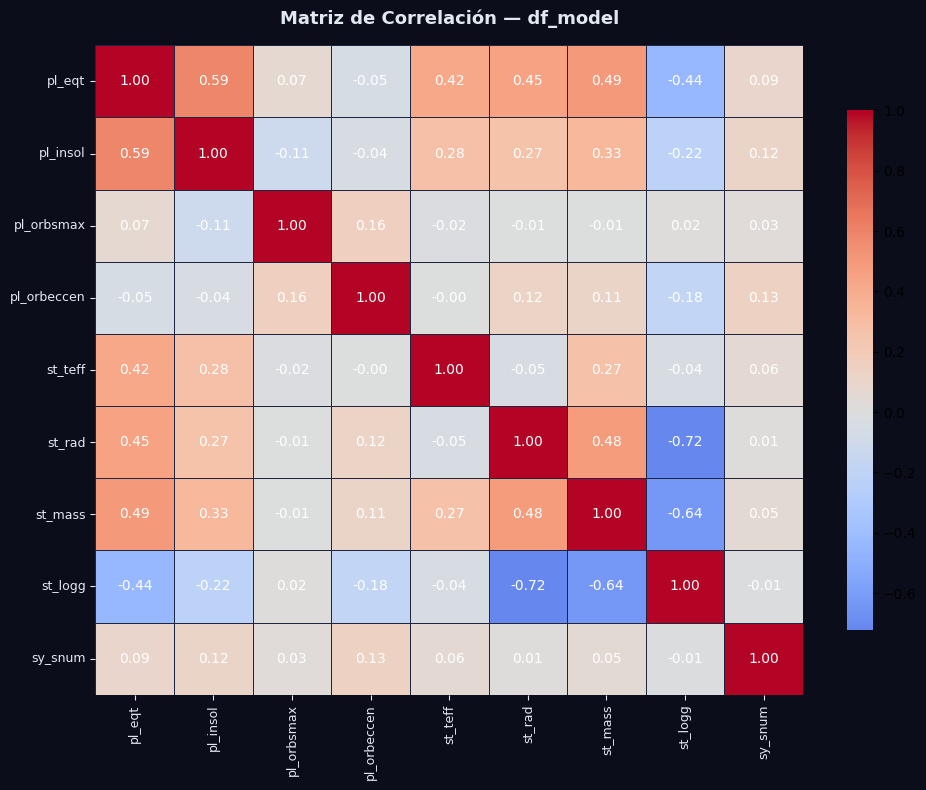


Correlación con pl_eqt (ordenado por valor absoluto):
pl_insol       0.587371
st_mass        0.491618
st_rad         0.451124
st_logg        0.444563
st_teff        0.424145
sy_snum        0.092600
pl_orbsmax     0.066231
pl_orbeccen    0.051549


In [15]:
# Matriz de correlación
corr = df_subconjunto.corr(method="pearson")

# Gráfica
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor("#0b0e1a")
ax.set_facecolor("#111628")

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor="#1e2540",
    ax=ax,
    annot_kws={"size": 10, "color": "white"},
    cbar_kws={"shrink": 0.8}
)

ax.set_title("Matriz de Correlación — df_model",
             color="#e2e8f0", fontsize=13, fontweight="bold", pad=15)
ax.tick_params(colors="#e2e8f0", labelsize=9)

plt.tight_layout()
plt.savefig("correlacion_df_model.png", dpi=150, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

# Resumen numérico — correlación con pl_eqt ordenada por valor absoluto
print("\nCorrelación con pl_eqt (ordenado por valor absoluto):")
print(corr["pl_eqt"].drop("pl_eqt").abs().sort_values(ascending=False).to_string())

Increible matriz, cierto?, bueno, de aqui podemos ver varias cosas muy interesantes, podemos ver que al parecer las varibles que etan mas relacionadas con pl_eqt son:
-  pl_insol, muy logico ya que la insolacion esta estrechamente relacionada con la temperatura
- st_mass, tiene coherencia, ya que la masa de la estrella puede decir mucho de su efecto en los planetas
- st_rad, tiene sentido que el radio de la estrella sea influyente
- st_logg, valor alto absoluto, pero es negativo, podriamos quitarla
- st_teff, temperatura efectiva de la estrella, obviamente esta relacionada

De esto podemos ver ciertas cosas, podriamos eliminar stellar mass ya que esta relacionada con el radio, su informacion de cierta manera estaria capturada ahi. `st_logg`, realmente la relacion es negativa fuerte, podriamos quitarla sin problema. `sy_num`, al parecer el numero de estrellas no esta relacionado con la temperatura y en general no tiene relacion significativa con ninguna.

Ultima cosa: algo extraño es que `pl_orbsmax` no este relacionada con la temperatura, podria deberse a su relación con `pl_insol`, una opcion tambien podria ser quitarla.

RESUMEN:

Conservar: `pl_insol`, `st_teff` y `st_rad`. Las demas las eliminamos y creamos un dataframe con solo las variables de interes.

In [16]:
# crear dataframe con las variables de interes
vars_modelo = ["pl_eqt", "pl_insol", "st_teff", "st_rad"]
df_model = df_clean[vars_modelo].copy()

Ya que tenemos esas variables de interes, chequemos outliers y valors nulos dentro de ese dataframe que acabamos de crear

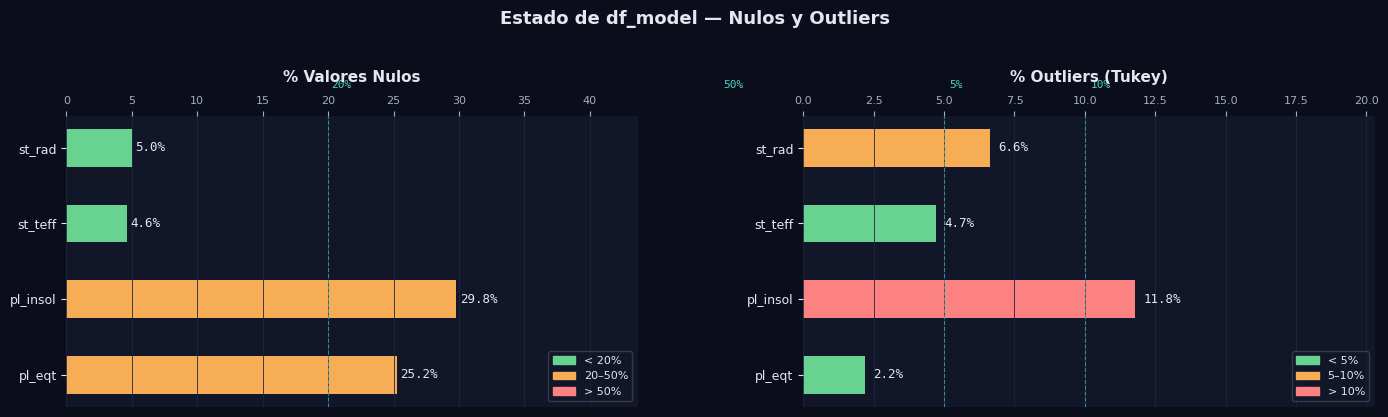

In [17]:
ivars_modelo = ["pl_eqt", "pl_insol", "st_teff", "st_rad"]
df_model = df_clean[vars_modelo].copy()

# ── Calcular nulos y outliers ─────────────────────────────────────────────────
nulos = df_model.isnull().mean() * 100

Q1 = df_model.quantile(0.25)
Q3 = df_model.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = {}
for col in df_model.columns:
    mask = (df_model[col] < lower[col]) | (df_model[col] > upper[col])
    outliers[col] = mask.sum() / df_model[col].notna().sum() * 100
outliers = pd.Series(outliers)

# ── Figura con dos subplots ───────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.patch.set_facecolor("#0b0e1a")

def get_color_nulos(pct):
    if pct >= 50: return "#fc8181"
    elif pct >= 20: return "#f6ad55"
    else: return "#68d391"

def get_color_outliers(pct):
    if pct >= 10: return "#fc8181"
    elif pct >= 5: return "#f6ad55"
    else: return "#68d391"

for ax, series, title, color_fn, refs, ref_label in [
    (axes[0], nulos,    "% Valores Nulos",   get_color_nulos,    [(20, "20%"), (50, "50%")], "nulos"),
    (axes[1], outliers, "% Outliers (Tukey)", get_color_outliers, [(5, "5%"), (10, "10%")],  "outliers"),
]:
    ax.set_facecolor("#111628")
    colors = [color_fn(p) for p in series.values]
    bars = ax.barh(series.index, series.values, color=colors, height=0.5, edgecolor="none")

    for bar, val in zip(bars, series.values):
        ax.text(val + 0.3, bar.get_y() + bar.get_height() / 2,
                f"{val:.1f}%", va="center", ha="left",
                fontsize=9, color="#e2e8f0", fontfamily="monospace")

    for xline, label in refs:
        ax.axvline(xline, color="#4fd1c5", linestyle="--", linewidth=0.8, alpha=0.6)
        ax.text(xline + 0.2, len(series) - 0.1, label,
                color="#4fd1c5", fontsize=8, va="top", fontfamily="monospace")

    ax.set_xlim(0, max(series.values) * 1.3 + 5)
    ax.set_title(title, color="#e2e8f0", fontsize=11, fontweight="bold", pad=10)
    ax.tick_params(axis="x", colors="#a0aec0", labelsize=8)
    ax.tick_params(axis="y", colors="#e2e8f0", labelsize=9)
    ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
    ax.grid(axis="x", color="#1e2540", linewidth=0.6)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")

# Leyendas
for ax, color_fn, labels in [
    (axes[0], get_color_nulos,    ["< 20%", "20–50%", "> 50%"]),
    (axes[1], get_color_outliers, ["< 5%",  "5–10%",  "> 10%"]),
]:
    patches = [
        mpatches.Patch(color="#68d391", label=labels[0]),
        mpatches.Patch(color="#f6ad55", label=labels[1]),
        mpatches.Patch(color="#fc8181", label=labels[2]),
    ]
    ax.legend(handles=patches, loc="lower right", framealpha=0.2,
              labelcolor="#e2e8f0", fontsize=8, facecolor="#111628")

fig.suptitle("Estado de df_model — Nulos y Outliers", color="#e2e8f0",
             fontsize=13, fontweight="bold", y=1.03)

plt.tight_layout()
plt.savefig("estado_df_model.png", dpi=150, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

Bien, de estas graficas podemos ver que de forma general no hay mucho de que prepocuparse, los valores nulos de nuestro subconjunto no pasan del 30%  y los outliers no pasan del 11, sin problema podemos imputar.

Pero hay que tener cuidado, si vemos detenidamente, la variable objetivo tiene 25% de datos faltantes, si llenamos con KNN o algun otro metodo, estariamos produciendo sesgo, ya que estariamos poniendo/ inventando datos donde no hay.

Para que nuetras metricas estadisticas esten basadas en datos reales, podriamos elimianr esas observaciones, perderiamos 25% de los datos, pero, serian todos reales. Vamos a irnos por ese camino.

### Eliminar valores nulos de pl_eqt

In [18]:
# ── Eliminar filas donde pl_eqt es nulo ──────────────────────────────────────
df_model = df_model.dropna(subset=["pl_eqt"])

print(f"Filas antes: 6107")
print(f"Filas después: {len(df_model)}")
print(f"Filas eliminadas: {6107 - len(df_model)}")
print(f"\nNulos restantes por columna:")
print((df_model.isnull().mean() * 100).round(2).to_string())

Filas antes: 6107
Filas después: 4566
Filas eliminadas: 1541

Nulos restantes por columna:
pl_eqt      0.00
pl_insol    7.88
st_teff     0.22
st_rad      0.35


bien, perdimos aproximadamente 1540 filas, pero aun contamos con 4566, lo cual es bastante bueno, ahora si, podemos llenar esos outliers con KNN, el cual encuentra los vecinos mas cercanos, los promedia y los llena, esto lo haremos para las variables de `pl_insol`,`st_teff` y `st_rad`

### Imputar valores faltantes con KNN

In [19]:
from sklearn.impute import KNNImputer

# ── Imputación KNN sobre los predictores ─────────────────────────────────────
imputer = KNNImputer(n_neighbors=5)

df_model_imputed = pd.DataFrame(
    imputer.fit_transform(df_model),
    columns=df_model.columns,
    index=df_model.index
)

# ── Verificación ──────────────────────────────────────────────────────────────
print("Nulos después de KNN:")
print((df_model_imputed.isnull().mean() * 100).round(2).to_string())
print(f"\nShape final: {df_model_imputed.shape}")

Nulos después de KNN:
pl_eqt      0.0
pl_insol    0.0
st_teff     0.0
st_rad      0.0

Shape final: (4566, 4)


Perfecto, ya no tenemos valores faltantes, vamos ahora con los outliers.

Perfectamente tambien podriamos usar KNN para remplazar los outliers, pero primero tendriamos que marcar esos datos atipicos como NaN, para que KNN los identifique como valores faltantes y luego los rellenaria con los datos de los planetas mas cercanos.

### Remplazar outliers con KNN

In [20]:
# 1. Marcar outliers como NaN
Q1 = df_model_imputed.quantile(0.25)
Q3 = df_model_imputed.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_model_clean = df_model_imputed.copy()

for col in df_model_clean.columns:
    if col == "pl_eqt":  # la variable objetivo no la tocamos
        continue
    mask = (df_model_clean[col] < lower[col]) | (df_model_clean[col] > upper[col])
    df_model_clean.loc[mask, col] = np.nan

print("Nulos después de marcar outliers:")
print((df_model_clean.isnull().mean() * 100).round(2).to_string())

# 2. Reimputar con KNN
df_model_clean = pd.DataFrame(
    KNNImputer(n_neighbors=5).fit_transform(df_model_clean),
    columns=df_model_clean.columns,
    index=df_model_clean.index
)

print("\nNulos después de KNN:")
print((df_model_clean.isnull().mean() * 100).round(2).to_string())
print(f"\nShape final: {df_model_clean.shape}")

Nulos después de marcar outliers:
pl_eqt       0.00
pl_insol    11.41
st_teff      6.22
st_rad       4.16

Nulos después de KNN:
pl_eqt      0.0
pl_insol    0.0
st_teff     0.0
st_rad      0.0

Shape final: (4566, 4)


Perfecto, con esto ya tendriamos nuestros datos limpios para trabajar, ahora dividamos nuestros datos, probemos con 80% de los datos originales, esto para train y test.

Para esto usaremos OLS regression para ver los datos mas explicitos y scikit-learn para las métricas predictivas y calculos de test.

Asi mismo despues de eso, grafiquemos los datos predichos vs los datos reales para ver la dispersion.

### Dividir datos train y test

In [21]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ── Split ─────────────────────────────────────────────────────────────────────
X = df_model_clean.drop(columns="pl_eqt")
y = df_model_clean["pl_eqt"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ── Statsmodels OLS ───────────────────────────────────────────────────────────
X_train_sm = sm.add_constant(X_train)
X_test_sm  = sm.add_constant(X_test)

model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# ── Sklearn — métricas en test set ───────────────────────────────────────────
y_pred = model_sm.predict(X_test_sm)

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "=" * 50)
print("  MÉTRICAS EN TEST SET (datos no vistos)")
print("=" * 50)
print(f"  R²:   {r2:.4f}")
print(f"  MAE:  {mae:.2f} K")
print(f"  RMSE: {rmse:.2f} K")
print(f"  Observaciones train: {len(X_train)}")
print(f"  Observaciones test:  {len(X_test)}")

                            OLS Regression Results                            
Dep. Variable:                 pl_eqt   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2544.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        08:21:19   Log-Likelihood:                -25527.
No. Observations:                3652   AIC:                         5.106e+04
Df Residuals:                    3648   BIC:                         5.109e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        319.1026     41.340      7.719      0.0

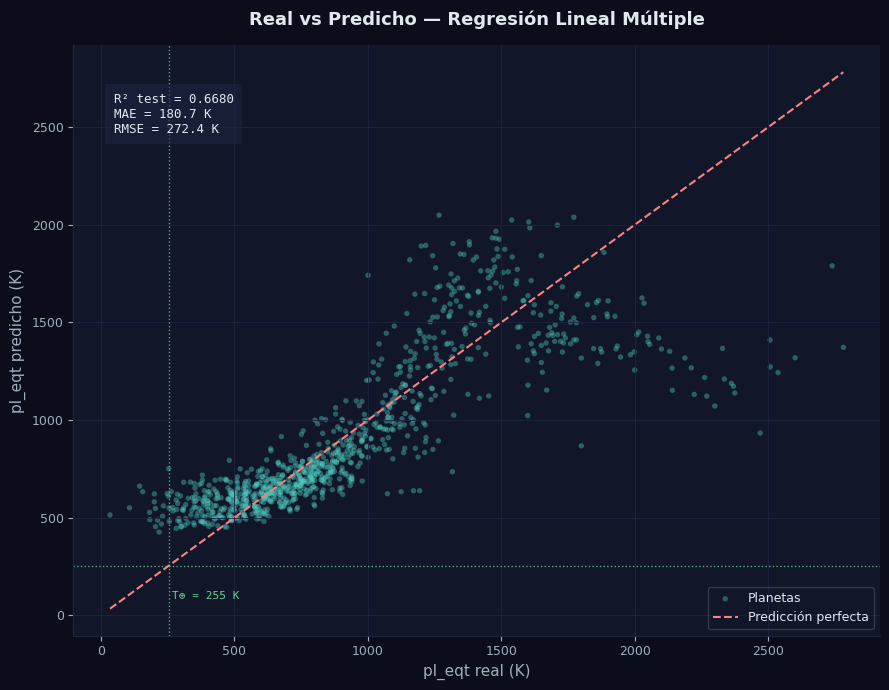

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# ── Predicciones ──────────────────────────────────────────────────────────────
y_pred = model_sm.predict(X_test_sm)

# ── Gráfica ───────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 7))
fig.patch.set_facecolor("#0b0e1a")
ax.set_facecolor("#111628")

# Scatter real vs predicho
ax.scatter(y_test, y_pred, alpha=0.4, s=15, color="#4fd1c5", edgecolors="none", label="Planetas")

# Línea perfecta (y = x)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
ax.plot(lims, lims, color="#fc8181", linewidth=1.5, linestyle="--", label="Predicción perfecta")

# Línea de la Tierra
ax.axvline(255, color="#68d391", linewidth=1, linestyle=":", alpha=0.8)
ax.axhline(255, color="#68d391", linewidth=1, linestyle=":", alpha=0.8)
ax.text(255 + 10, lims[0] + 50, "T⊕ = 255 K", color="#68d391", fontsize=8, fontfamily="monospace")

# Estilo
ax.set_xlabel("pl_eqt real (K)",      color="#a0aec0", fontsize=11)
ax.set_ylabel("pl_eqt predicho (K)",  color="#a0aec0", fontsize=11)
ax.set_title("Real vs Predicho — Regresión Lineal Múltiple",
             color="#e2e8f0", fontsize=13, fontweight="bold", pad=15)
ax.tick_params(colors="#a0aec0", labelsize=9)
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("#1e2540")
ax.grid(color="#1e2540", linewidth=0.6)
ax.legend(framealpha=0.2, labelcolor="#e2e8f0", fontsize=9, facecolor="#111628")

# Anotación R²
ax.text(0.05, 0.92, f"R² test = {r2:.4f}\nMAE = {mae:.1f} K\nRMSE = {rmse:.1f} K",
        transform=ax.transAxes, color="#e2e8f0", fontsize=9,
        fontfamily="monospace", verticalalignment="top",
        bbox=dict(facecolor="#1e2540", alpha=0.6, edgecolor="none", pad=6))

plt.tight_layout()
plt.savefig("real_vs_predicho.png", dpi=150, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

Wow, increible grafica, podemos de forma aproximada en temperaturas dentro del rango de [500 1500] Kelvin, el modelo predice bastante bien, , sin embargo en temperaturas mas extremas, el modelo presenta dificultades para las predicciones.

Ademas, las metricas nos dicen lo siguiente.


- R² = 0.677 — el modelo explica el 67.7% de la variabilidad en pl_eqt. Para datos astronómicos observacionales con ruido real, es un resultado muy respetable
- R² ajustado = 0.676 — prácticamente igual al R², lo que confirma que no hay variables innecesarias inflando el modelo
- F-statistic = 2544, p = 0.00 — el modelo en conjunto es estadísticamente significativo

- pl_insol con coef 1.43, p = 0.000, es el predictor más fuerte y significativo. Por cada unidad extra de insolación, pl_eqt sube 1.43 K
- st_rad con coef 191.72, p = 0.000, es muy significativo. Cada radio solar adicional de la estrella sube 191 K la temperatura del planeta
- st_teff con coef 0.018, p = 0.058, esta justo en el límite. No es significativa al 95% de confianza, su intervalo incluye el cero [-0.001, 0.037]

Consideraciones:

La tabla de OLS indica que hay una colinealidad numerica muy fuerte, tal vez debido a la relacion de algunas variables.

RMSE = 272 K, esto es un problema ya que si nuestra temperatura objetivo es de 255 K, y nuestro error rd fr 272 K, significaria que nuestro error es increiblemente alto para predecir.

En general el modelo es aceptable, pero presenta algunas dificultades para predecir.

### Predicciones con el modelo de regresion

Ya sabemos que nuestro modelo es realmente malo para predecir, pero veamos como hace las predicciones, tomemos un par de planetas los cuales conocemos su pl_eqt y tratemos de predecirlos de forma breve para ver como se comporta.

In [23]:
# ── Planetas cercanos a 255 K ─────────────────────────────────────────────────
rango_min = 200
rango_max = 320

# Agregar nombre del planeta y hostname del df_clean
df_habitables = df_clean.loc[df_model_clean.index, ["pl_name", "hostname"]].copy()
df_habitables["pl_eqt_real"]     = df_model_clean["pl_eqt"].values
df_habitables["pl_eqt_predicho"] = model_sm.predict(sm.add_constant(X))
df_habitables["diff_tierra"]     = (df_habitables["pl_eqt_real"] - 255).abs()

# Filtrar zona habitable
habitables = df_habitables[
    df_habitables["pl_eqt_real"].between(rango_min, rango_max)
].sort_values("diff_tierra")

print(f"Planetas en zona habitable térmica ({rango_min}–{rango_max} K): {len(habitables)}")
print(f"\nTop 20 más cercanos a 255 K (T⊕):")
print(habitables[["pl_name", "hostname", "pl_eqt_real", "pl_eqt_predicho", "diff_tierra"]].head(20).to_string(index=False))

Planetas en zona habitable térmica (200–320 K): 159

Top 20 más cercanos a 255 K (T⊕):
      pl_name    hostname  pl_eqt_real  pl_eqt_predicho  diff_tierra
   HD 40307 g    HD 40307       255.00       550.605169         0.00
   TOI-1338 b  TOI-1338 A       254.65       677.706873         0.35
   TOI-2257 b    TOI-2257       256.00       481.128875         1.00
Kepler-1704 b Kepler-1704       253.80       750.816022         1.20
  HD 152843 c   HD 152843       253.08       899.734270         1.92
 Kepler-539 c  Kepler-539       253.00       610.746028         2.00
 Kepler-967 c  Kepler-967       258.00       569.388962         3.00
 Kepler-553 c  Kepler-553       251.00       588.525157         4.00
  HD 109286 b   HD 109286       259.40       633.816566         4.40
  Wolf 1069 b   Wolf 1069       250.10       455.402868         4.90
 Kepler-991 b  Kepler-991       260.00       518.938034         5.00
Kepler-1593 b Kepler-1593       260.00       560.035328         5.00
 TRAPPIST-1 e  T

Vaya, si que es malo, es casi el doble de lo que se predice.

Pero bueno, para un primer acercamiento, se considera aceptable.

#Seccion de What if?

1 - Qué pasaria si vieramos la distribución de los datos para encontrar alguna asimetroi y corregirla, mejoraria el modelo?

2 - Qué tal si en vez de usar una seleccion de variables por contexto, buscamos la mejor combinacion de las variables para tratar de mejorarlo?

3 - Si creamos alguna interacción entre las variables, mejoraria el modelo?

4- si normalizamos los datos, el modelo mejoraria?

# 1) Ver distribucion

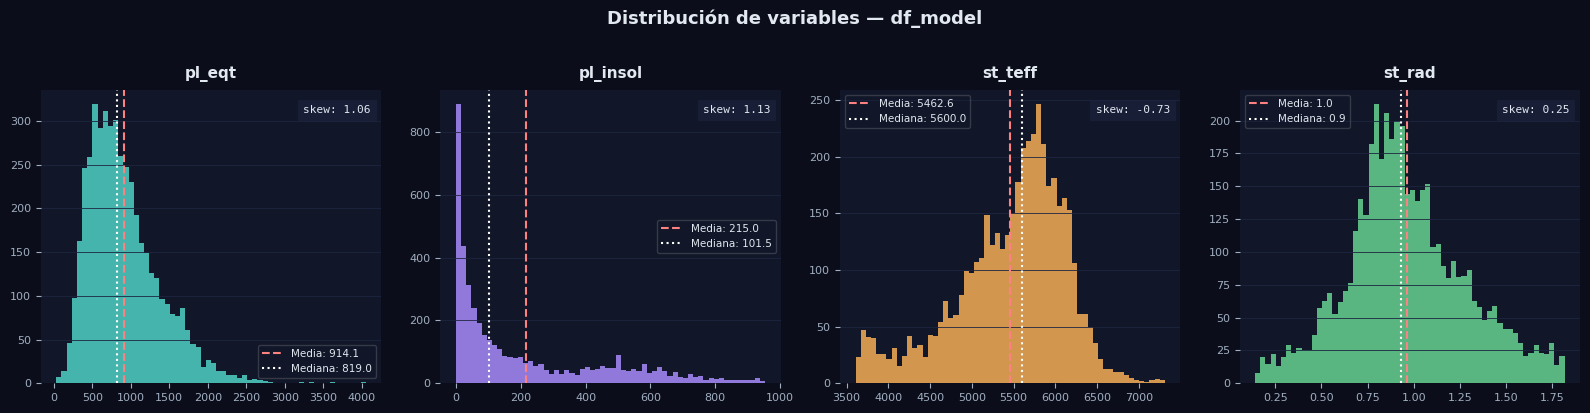

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.patch.set_facecolor("#0b0e1a")

vars_plot = ["pl_eqt", "pl_insol", "st_teff", "st_rad"]
colors    = ["#4fd1c5", "#a78bfa", "#f6ad55", "#68d391"]

for ax, col, color in zip(axes, vars_plot, colors):
    ax.set_facecolor("#111628")
    data = df_model_clean[col].dropna()

    ax.hist(data, bins=60, color=color, alpha=0.85, edgecolor="none")

    # Media y mediana
    ax.axvline(data.mean(),   color="#fc8181", linewidth=1.5, linestyle="--", label=f"Media: {data.mean():.1f}")
    ax.axvline(data.median(), color="#fff",    linewidth=1.5, linestyle=":",  label=f"Mediana: {data.median():.1f}")

    ax.set_title(col, color="#e2e8f0", fontsize=11, fontweight="bold", pad=8)
    ax.tick_params(colors="#a0aec0", labelsize=8)
    ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
    ax.grid(axis="y", color="#1e2540", linewidth=0.6)
    ax.legend(framealpha=0.2, labelcolor="#e2e8f0", fontsize=7.5, facecolor="#111628")

    # Skewness
    skew = data.skew()
    ax.text(0.97, 0.92, f"skew: {skew:.2f}", transform=ax.transAxes,
            color="#e2e8f0", fontsize=8, ha="right", fontfamily="monospace",
            bbox=dict(facecolor="#1e2540", alpha=0.6, edgecolor="none", pad=4))

fig.suptitle("Distribución de variables — df_model", color="#e2e8f0",
             fontsize=13, fontweight="bold", y=1.02)

plt.tight_layout()
plt.savefig("distribucion_variables.png", dpi=150, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

Claramente hay asimetria, pero solo en pl_insol, veamos como reacciona a una escala logaritmica

In [25]:
import numpy as np

df_model_log = df_model_clean.copy()
df_model_log["pl_insol"] = np.log1p(df_model_clean["pl_insol"])

X_log = df_model_log.drop(columns="pl_eqt")
y_log = df_model_log["pl_eqt"]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

X_train_log_sm = sm.add_constant(X_train_log)
X_test_log_sm  = sm.add_constant(X_test_log)

model_log = sm.OLS(y_train_log, X_train_log_sm).fit()
print(model_log.summary())

y_pred_log = model_log.predict(X_test_log_sm)
r2_log   = r2_score(y_test_log, y_pred_log)
mae_log  = mean_absolute_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

print("\n" + "=" * 50)
print("  COMPARACIÓN DE MODELOS")
print("=" * 50)
print(f"  {'':20s}  {'Original':>10}  {'Log(pl_insol)':>13}")
print(f"  {'R²':20s}  {r2:>10.4f}  {r2_log:>13.4f}")
print(f"  {'MAE (K)':20s}  {mae:>10.2f}  {mae_log:>13.2f}")
print(f"  {'RMSE (K)':20s}  {rmse:>10.2f}  {rmse_log:>13.2f}")

                            OLS Regression Results                            
Dep. Variable:                 pl_eqt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     3140.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        08:49:12   Log-Likelihood:                -25258.
No. Observations:                3652   AIC:                         5.052e+04
Df Residuals:                    3648   BIC:                         5.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -180.5310     38.128     -4.735      0.0

Vaya, si mejoó, no mucho pero mejoro.

R^2 ahora explica el 72.1 % de los datos originales

El error bajo de 272 K a 250 K, no hay mucha mejora, pero mejoro.

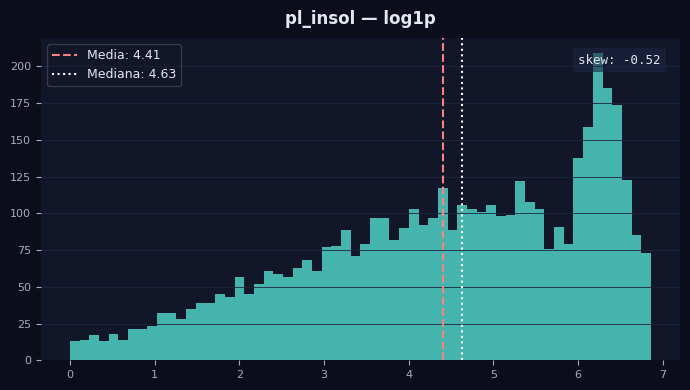

In [26]:
fig, ax = plt.subplots(figsize=(7, 4))
fig.patch.set_facecolor("#0b0e1a")
ax.set_facecolor("#111628")

data = np.log1p(df_model_clean["pl_insol"])

ax.hist(data, bins=60, color="#4fd1c5", alpha=0.85, edgecolor="none")
ax.axvline(data.mean(),   color="#fc8181", linewidth=1.5, linestyle="--", label=f"Media: {data.mean():.2f}")
ax.axvline(data.median(), color="#fff",    linewidth=1.5, linestyle=":",  label=f"Mediana: {data.median():.2f}")

skew = data.skew()
ax.text(0.97, 0.92, f"skew: {skew:.2f}", transform=ax.transAxes,
        color="#e2e8f0", fontsize=9, ha="right", fontfamily="monospace",
        bbox=dict(facecolor="#1e2540", alpha=0.6, edgecolor="none", pad=4))

ax.set_title("pl_insol — log1p", color="#e2e8f0", fontsize=12, fontweight="bold", pad=10)
ax.tick_params(colors="#a0aec0", labelsize=8)
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.grid(axis="y", color="#1e2540", linewidth=0.6)
ax.legend(framealpha=0.2, labelcolor="#e2e8f0", fontsize=9, facecolor="#111628")

plt.tight_layout()
plt.savefig("distribucion_log_insol.png", dpi=150, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

Ya hay una mejor simetria de datos, no es la mejor claramente, pero mejoro.

Interesante escenario, no creen?

# 2) Mejor combinación
Probemos a ver si una combinacion de ciertas variables funcionamejor que la otra, como solo nos reducimos a variables, probemos todas las combinaciones posibles para ver cual da mejores resultados.

In [27]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# ── Dataset con transformación logarítmica ────────────────────────────────────
X_full = df_model_log.drop(columns="pl_eqt")
y_full = df_model_log["pl_eqt"]

# ── Exhaustive search con CV (k=5) ────────────────────────────────────────────
resultados = []

for r in range(1, len(X_full.columns) + 1):
    for combo in combinations(X_full.columns, r):
        X_combo = X_full[list(combo)]

        r2_scores  = cross_val_score(LinearRegression(), X_combo, y_full, cv=5, scoring="r2")
        mae_scores = cross_val_score(LinearRegression(), X_combo, y_full, cv=5, scoring="neg_mean_absolute_error")

        resultados.append({
            "variables":  " + ".join(combo),
            "n_vars":     len(combo),
            "R² medio":   round(r2_scores.mean(), 4),
            "R² std":     round(r2_scores.std(), 4),
            "MAE medio":  round(-mae_scores.mean(), 2),
            "MAE std":    round(mae_scores.std(), 2),
        })

df_resultados = pd.DataFrame(resultados).sort_values("R² medio", ascending=False)

print("=" * 75)
print("  EXHAUSTIVE SEARCH — Cross Validation (k=5)")
print("=" * 75)
print(df_resultados.to_string(index=False))

  EXHAUSTIVE SEARCH — Cross Validation (k=5)
                  variables  n_vars  R² medio  R² std  MAE medio  MAE std
          pl_insol + st_rad       2    0.6944  0.0207     167.79    15.02
pl_insol + st_teff + st_rad       3    0.6933  0.0200     168.33    14.79
                   pl_insol       1    0.6910  0.0269     169.58    15.41
         pl_insol + st_teff       2    0.6891  0.0209     169.73    13.57
           st_teff + st_rad       2    0.1016  0.1470     317.82    34.85
                     st_rad       1    0.0988  0.1467     317.43    34.25
                    st_teff       1    0.0328  0.1293     338.44    44.56


Bien!, al parecer la mejor combinación posible es utilizando solamente pl_insol y st_rad, el cual da un error mucho mas bajo.

Interesante reacción.

# 3) Interacciones entre variables

Probemos una interacción de variables.

Digamos:

pl_insol / st_rad

st_tff/pl_insol

creemos esas variables y verifiquemos las metricas

In [28]:
import numpy as np

# ── Crear variables derivadas ─────────────────────────────────────────────────
df_model_derived = df_model_log.copy()

df_model_derived["insol_rad"]  = df_model_log["pl_insol"] / df_model_log["st_rad"]
df_model_derived["teff_insol"] = df_model_log["st_teff"]  / df_model_log["pl_insol"]

# ── Split ─────────────────────────────────────────────────────────────────────
X_der = df_model_derived.drop(columns="pl_eqt")
y_der = df_model_derived["pl_eqt"]

X_train_der, X_test_der, y_train_der, y_test_der = train_test_split(
    X_der, y_der, test_size=0.2, random_state=42
)

X_train_der_sm = sm.add_constant(X_train_der)
X_test_der_sm  = sm.add_constant(X_test_der)

# ── Modelo ────────────────────────────────────────────────────────────────────
model_der = sm.OLS(y_train_der, X_train_der_sm).fit()
print(model_der.summary())

# ── Métricas test ─────────────────────────────────────────────────────────────
y_pred_der = model_der.predict(X_test_der_sm)

r2_der   = r2_score(y_test_der, y_pred_der)
mae_der  = mean_absolute_error(y_test_der, y_pred_der)
rmse_der = np.sqrt(mean_squared_error(y_test_der, y_pred_der))

print("\n" + "=" * 45)
print("  MÉTRICAS EN TEST SET")
print("=" * 45)
print(f"  R²:   {r2_der:.4f}")
print(f"  MAE:  {mae_der:.2f} K")
print(f"  RMSE: {rmse_der:.2f} K")

                            OLS Regression Results                            
Dep. Variable:                 pl_eqt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1888.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        09:15:57   Log-Likelihood:                -25254.
No. Observations:                3652   AIC:                         5.052e+04
Df Residuals:                    3646   BIC:                         5.056e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -218.7517     41.790     -5.235      0.0

Realmente no mejoro mucho, R^2 sigue igual, pero ojo, si vemos con atención, al parecer al agregar esas interacciones, st_teff, dejo de importar en un 70%, muy interesante.

# Estandarización de coeficientes

Como vemos, la estandarización puede ayudar a los datos, resolviendo la multicolinealidad.

Probemos ese metodo para ver si el metodo de la regresion lineal multiple mejora o empeora.

In [51]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# ── Crear variables derivadas ─────────────────────────────────────────────────
df_model_derived = df_model_log.copy()

df_model_derived["insol_rad"]  = df_model_log["pl_insol"] / df_model_log["st_rad"]
df_model_derived["teff_insol"] = df_model_log["st_teff"]  / df_model_log["pl_insol"]

# ── Split ─────────────────────────────────────────────────────────────────────
X_der = df_model_derived.drop(columns="pl_eqt")
y_der = df_model_derived["pl_eqt"]

X_train_der, X_test_der, y_train_der, y_test_der = train_test_split(
    X_der, y_der, test_size=0.2, random_state=42
)

# ── Estandarizar ──────────────────────────────────────────────────────────────
scaler = StandardScaler()
X_train_der_scaled = scaler.fit_transform(X_train_der)
X_test_der_scaled = scaler.transform(X_test_der)

# Convertir de vuelta a DataFrame CON LOS ÍNDICES CORRECTOS
X_train_der_scaled = pd.DataFrame(X_train_der_scaled,
                                   columns=X_train_der.columns,
                                   index=X_train_der.index)
X_test_der_scaled = pd.DataFrame(X_test_der_scaled,
                                 columns=X_test_der.columns,
                                 index=X_test_der.index)

X_train_der_sm = sm.add_constant(X_train_der_scaled)
X_test_der_sm  = sm.add_constant(X_test_der_scaled)

# ── Modelo ────────────────────────────────────────────────────────────────────
model_der = sm.OLS(y_train_der, X_train_der_sm).fit()
print(model_der.summary())

# ── Métricas test ─────────────────────────────────────────────────────────────
y_pred_der = model_der.predict(X_test_der_sm)

r2_der   = r2_score(y_test_der, y_pred_der)
mae_der  = mean_absolute_error(y_test_der, y_pred_der)
rmse_der = np.sqrt(mean_squared_error(y_test_der, y_pred_der))

print("\n" + "=" * 45)
print("  MÉTRICAS EN TEST SET")
print("=" * 45)
print(f"  R²:   {r2_der:.4f}")
print(f"  MAE:  {mae_der:.2f} K")
print(f"  RMSE: {rmse_der:.2f} K")

# ── Ranking de importancia ───────────────────────────────────────────────────
print("\n" + "=" * 45)
print("  RANKING DE VARIABLES POR IMPACTO")
print("=" * 45)
coefs = model_der.params[1:].abs().sort_values(ascending=False)
print(coefs)

                            OLS Regression Results                            
Dep. Variable:                 pl_eqt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1888.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        12:37:54   Log-Likelihood:                -25254.
No. Observations:                3652   AIC:                         5.052e+04
Df Residuals:                    3646   BIC:                         5.056e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        909.6811      4.037    225.318      0.0

Al estandarizar las variables predictoras, logramos resolver el problema de multicolinealidad que afectaba al modelo original. El **Condition Number bajó de 4.57e+05 a 5.23**, indicando que los coeficientes ahora son numéricamente estables y confiables.

Las métricas de desempeño (R², MAE, RMSE) se mantuvieron idénticas, lo cual es esperado, ya que la estandarización no cambia las relaciones entre variables, solo reescala los datos. Sin embargo, ahora podemos **comparar directamente los coeficientes** para determinar el impacto relativo de cada variable.

El análisis revela que `pl_insol` es, por mucho, la variable más influyente (coef = 354.44), siendo aproximadamente 6 veces más importante que `st_rad` (coef = 59.16). Las variables derivadas (`insol_rad` y `teff_insol`) aportan poco al modelo, mientras que `st_teff` resultó estadísticamente no significativa (p = 0.705).

# Modelo NO lineal


Bien, ya que tenemos los datos bien limpios, construir un modelo ya es tecnicamente mas sencillo.

Para la sección de un modelo no lineal, probemos usar un modelo polinomial, para esto usaremos las 8 variables que teniamos en un principio.

Ahora, utilizaremos el metodo de lasso, el cual lleva a los coeficientes del modelo a 0, eliminando variables con poca importancia.

Como realmente no sabemos cual parametro es el mejor alpha para poder trabajar, encontraremos el mejor alpha con validación cruzada.

Posterioemente calculemos las metricas correspondientes en comparación con los demas modelos.

In [31]:
import numpy as np

# ── Construir dataset desde df_clean con todas las variables relevantes ────────
vars_all = ["pl_eqt", "pl_insol", "st_teff", "st_rad", "st_mass",
            "st_logg", "pl_orbsmax", "pl_orbeccen"]

df_lasso = df_clean[vars_all].copy()

# Eliminar filas donde pl_eqt es nulo (variable objetivo)
df_lasso = df_lasso.dropna(subset=["pl_eqt"])

# Imputar nulos restantes con KNN
from sklearn.impute import KNNImputer
df_lasso = pd.DataFrame(
    KNNImputer(n_neighbors=5).fit_transform(df_lasso),
    columns=df_lasso.columns
)

# Transformación log1p a pl_insol
df_lasso["pl_insol"] = np.log1p(df_lasso["pl_insol"])

print(f"Shape: {df_lasso.shape}")
print(f"Nulos: {df_lasso.isnull().sum().sum()}")

Shape: (4566, 8)
Nulos: 0


Aqui se imputaron los datos, ya que regresamos al dataset previo a los modelos, esto para encontrar las variables que teniamos en un principio y poder ver cuales pueden ser buenas variables para describir el comportamiento del modelo.

In [34]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

X_lasso = df_lasso.drop(columns="pl_eqt")
y_lasso = df_lasso["pl_eqt"]

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_lasso, y_lasso, test_size=0.2, random_state=42
)

# ── Pipeline: Poly → Scaler → LassoCV ────────────────────────────────────────
pipeline = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lasso",  LassoCV(cv=5, max_iter=10000, random_state=42))
])

pipeline.fit(X_train_l, y_train_l)

# ── Métricas ──────────────────────────────────────────────────────────────────
y_pred_l = pipeline.predict(X_test_l)

r2_l   = r2_score(y_test_l, y_pred_l)
mae_l  = mean_absolute_error(y_test_l, y_pred_l)
rmse_l = np.sqrt(mean_squared_error(y_test_l, y_pred_l))

best_alpha = pipeline.named_steps["lasso"].alpha_

# ── Variables seleccionadas por Lasso ─────────────────────────────────────────
feature_names = pipeline.named_steps["poly"].get_feature_names_out(X_lasso.columns)
coefs         = pipeline.named_steps["lasso"].coef_
seleccionadas = [(name, coef) for name, coef in zip(feature_names, coefs) if coef != 0]

print("=" * 55)
print("  LASSO + POLINOMIAL (grado 2) + CV")
print("=" * 55)
print(f"  Mejor alpha:                  {best_alpha:.4f}")
print(f"  Términos polinomiales totales:{len(feature_names)}")
print(f"  Términos seleccionados:       {len(seleccionadas)}")
print(f"\n  R²:   {r2_l:.4f}")
print(f"  MAE:  {mae_l:.2f} K")
print(f"  RMSE: {rmse_l:.2f} K")

print(f"\n  Términos seleccionados (ordenados por |coef|):")
for name, coef in sorted(seleccionadas, key=lambda x: abs(x[1]), reverse=True):
    print(f"  {name:35s}  {coef:.4f}")

print("\n" + "=" * 55)
print("  COMPARACIÓN FINAL")
print("=" * 55)
print(f"  {'Modelo':30s}  {'R²':>8}  {'MAE':>8}  {'RMSE':>8}")
print(f"  {'Lineal (log insol + st_rad)':30s}  {0.7210:>8.4f}  {163.46:>8.2f}  {249.71:>8.2f}")
print(f"  {'Lasso Polinomial (todas)':30s}  {r2_l:>8.4f}  {mae_l:>8.2f}  {rmse_l:>8.2f}")

  LASSO + POLINOMIAL (grado 2) + CV
  Mejor alpha:                  15.4855
  Términos polinomiales totales:35
  Términos seleccionados:       4

  R²:   0.9067
  MAE:  81.85 K
  RMSE: 144.40 K

  Términos seleccionados (ordenados por |coef|):
  pl_insol^2                           418.1614
  pl_insol st_rad                      8.7140
  pl_insol pl_orbsmax                  2.9128
  pl_insol pl_orbeccen                 2.8283

  COMPARACIÓN FINAL
  Modelo                                R²       MAE      RMSE
  Lineal (log insol + st_rad)       0.7210    163.46    249.71
  Lasso Polinomial (todas)          0.9067     81.85    144.40


En este modelo, parece que le fue bastante bien, podemos ver que tenemos una R^2 de 90%, es decir, el modelo polinomial combinado con el metodo de lasso, puede explicar bastante bien la variabilidad del conjunto de datos para esas variables en especifico.

Ahora nuestro error no es tan significativo en comparación con los demas modelos, pues solo tenemos un RMSE de 144.4 K, lo cual es mas que aceptable.

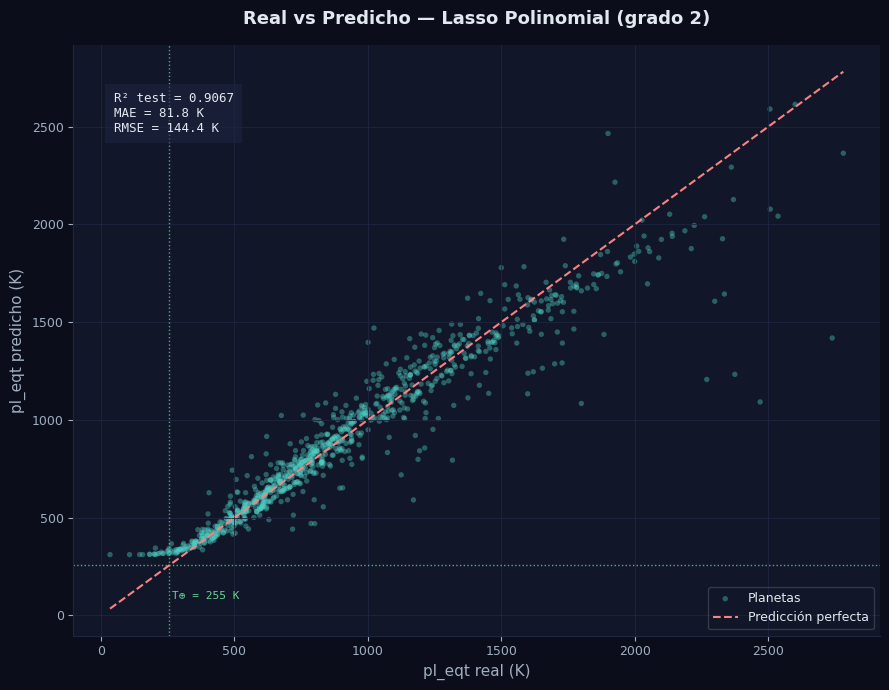

In [35]:
import matplotlib.pyplot as plt

y_pred_l = pipeline.predict(X_test_l)

fig, ax = plt.subplots(figsize=(9, 7))
fig.patch.set_facecolor("#0b0e1a")
ax.set_facecolor("#111628")

ax.scatter(y_test_l, y_pred_l, alpha=0.4, s=15, color="#4fd1c5", edgecolors="none", label="Planetas")

lims = [min(y_test_l.min(), y_pred_l.min()), max(y_test_l.max(), y_pred_l.max())]
ax.plot(lims, lims, color="#fc8181", linewidth=1.5, linestyle="--", label="Predicción perfecta")

ax.axvline(255, color="#68d391", linewidth=1, linestyle=":", alpha=0.8)
ax.axhline(255, color="#68d391", linewidth=1, linestyle=":", alpha=0.8)
ax.text(255 + 10, lims[0] + 50, "T⊕ = 255 K", color="#68d391", fontsize=8, fontfamily="monospace")

ax.set_xlabel("pl_eqt real (K)",     color="#a0aec0", fontsize=11)
ax.set_ylabel("pl_eqt predicho (K)", color="#a0aec0", fontsize=11)
ax.set_title("Real vs Predicho — Lasso Polinomial (grado 2)",
             color="#e2e8f0", fontsize=13, fontweight="bold", pad=15)
ax.tick_params(colors="#a0aec0", labelsize=9)
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("#1e2540")
ax.grid(color="#1e2540", linewidth=0.6)
ax.legend(framealpha=0.2, labelcolor="#e2e8f0", fontsize=9, facecolor="#111628")

ax.text(0.05, 0.92, f"R² test = {r2_l:.4f}\nMAE = {mae_l:.1f} K\nRMSE = {rmse_l:.1f} K",
        transform=ax.transAxes, color="#e2e8f0", fontsize=9,
        fontfamily="monospace", verticalalignment="top",
        bbox=dict(facecolor="#1e2540", alpha=0.6, edgecolor="none", pad=6))

plt.tight_layout()
plt.savefig("real_vs_predicho_lasso.png", dpi=150, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

Aqui estamos graficando los valores reales vs los predichos por el modelo polinomial + lasso, a los cuales vemos que se comporta bastane bien, vemos que los datos dentro de la temperatura de interes, son bastante buenos, sin embargo podemos ver que la la temperatura en aumento, la variabilidad de los datos va aumentando, teniendo problemas para predecir aproximadamente despues de los 2000 K.

Probemos predecir los datos de algunos planetas para ver que tan lejos estamos en comparación a los datos reales.

In [36]:
import pandas as pd

# ── Predicciones sobre todo el dataset ───────────────────────────────────────
X_all = df_lasso.drop(columns="pl_eqt")
y_all = df_lasso["pl_eqt"]

y_pred_all = pipeline.predict(X_all)

# ── Construir tabla con nombres desde df_clean ────────────────────────────────
df_habitables = df_clean.loc[df_lasso.index, ["pl_name", "hostname"]].copy()
df_habitables["pl_eqt_real"]     = y_all.values
df_habitables["pl_eqt_predicho"] = y_pred_all
df_habitables["diff_tierra"]     = (df_habitables["pl_eqt_real"] - 255).abs()

# ── Filtrar zona habitable térmica ────────────────────────────────────────────
rango_min = 200
rango_max = 320

habitables = df_habitables[
    df_habitables["pl_eqt_real"].between(rango_min, rango_max)
].sort_values("diff_tierra")

print(f"Planetas en zona habitable térmica ({rango_min}–{rango_max} K): {len(habitables)}")
print(f"\nTop 20 más cercanos a 255 K (T⊕):")
print(habitables[["pl_name", "hostname", "pl_eqt_real", "pl_eqt_predicho", "diff_tierra"]]
      .head(20).to_string(index=False))

Planetas en zona habitable térmica (200–320 K): 159

Top 20 más cercanos a 255 K (T⊕):
         pl_name      hostname  pl_eqt_real  pl_eqt_predicho  diff_tierra
      HAT-P-56 b      HAT-P-56       255.00       342.457827         0.00
    Kepler-304 d    Kepler-304       254.65       324.259586         0.35
    Kepler-369 c    Kepler-369       256.00       318.764889         1.00
         K2-45 b         K2-45       253.80       315.411857         1.20
        GJ 849 c        GJ 849       253.08       909.474293         1.92
   Kepler-1640 b   Kepler-1640       253.00       332.108176         2.00
     Kepler-23 b     Kepler-23       258.00       324.266352         3.00
Kepler-1660 AB b Kepler-1660 A       251.00       317.618997         4.00
        GJ 581 c        GJ 581       259.40       319.906554         4.40
    Kepler-764 b    Kepler-764       250.10       316.839904         4.90
     Kepler-24 e     Kepler-24       260.00       329.710358         5.00
         K2-30 b         

Bien, parece que no estamos tan mal, en comparación con el primer modelo, este se comporta bastante bien, de modo que seria un buen candidato como modelo predictor de `pl_eqt`.

### Puntos importantes

- Si nuestro objetivo es predecir, este modelo es muy bueno, sin embargo, perdimos interpretabilidad, ya que al ser un modelo ponlinomial, tenemos algun termino con exponente 'n', de modo que al interpretar los datos, eso no nos dice mucho realmente.

- Si queremos predicción, Polinimio + lasso, es una excelente opcion.

- Si quisieramos interpretar los datos, el modelo de regresión lineal multiple nos permitira ver el efecto de cada variable con respecto a la salida.

# Modelo de inferencia

En este apartado vamos a crear un modelo enfocado en la **inferencia estadística**, no en la predicción. Esto significa que nuestro objetivo principal no es maximizar el R² (capacidad predictiva), sino **entender el comportamiento y las relaciones entre las variables** en nuestros datos.

Para lograr esto, nos enfocaremos en analizar los **p-values** de cada variable, lo que nos permitirá identificar cuáles tienen un efecto estadísticamente significativo.

Ahora bien, si no nos enfocamos en la R², ¿deberíamos entonces evaluar todas las variables disponibles? La respuesta es: sí, pero de manera estructurada.

Para ello, utilizaremos el método de **selección hacia atrás (backward elimination)**. Este proceso consiste en:

1. Comenzar con todas las variables candidatas
2. Ajustar el modelo y evaluar los p-values
3. Eliminar la variable con el p-value más alto (menos significativa)
4. Repetir el proceso hasta que todas las variables restantes tengan un **p-value < 0.05** (nivel de confianza del 95%)

De este modo, en cada iteración podremos observar qué variable se descarta y por qué, hasta llegar a un modelo parsimonioso con solo variables significativas.

Como punto de partida, utilizaremos las variables del dataset original (antes de crear los modelos de interacción), lo que nos servirá como referencia para las iteraciones.

In [38]:

# ── Variables numéricas relevantes como punto de partida ─────────────────────
excluir = ["pl_eqt", "ra", "dec", "sy_snum", "sy_pnum",
           "pl_controv_flag", "ttv_flag", "disc_year"]

df_inf = df_clean.select_dtypes(include="number").drop(
    columns=[c for c in excluir if c in df_clean.columns]
)

# Agregar variable objetivo
df_inf["pl_eqt"] = df_clean["pl_eqt"]

# Eliminar filas donde pl_eqt es nulo
df_inf = df_inf.dropna(subset=["pl_eqt"])

# Imputar nulos restantes con KNN
from sklearn.impute import KNNImputer
df_inf = pd.DataFrame(
    KNNImputer(n_neighbors=5).fit_transform(df_inf),
    columns=df_inf.columns
)

print(f"Shape: {df_inf.shape}")
print(f"Variables disponibles: {df_inf.shape[1] - 1}")

Shape: (4566, 60)
Variables disponibles: 59


In [39]:
X_inf = df_inf.drop(columns="pl_eqt")
y_inf = df_inf["pl_eqt"]

def backward_elimination(X, y, umbral=0.05):
    variables = list(X.columns)
    iteracion = 1

    while True:
        X_sm = sm.add_constant(pd.DataFrame(X_inf[variables]))
        modelo = sm.OLS(y, X_sm).fit()

        pvalues = modelo.pvalues.drop("const")
        max_pval = pvalues.max()
        var_eliminar = pvalues.idxmax()

        print(f"Iteración {iteracion:02d} | Variables: {len(variables):02d} | "
              f"Peor variable: {var_eliminar:25s} | p-value: {max_pval:.4f}")

        if max_pval > umbral:
            variables.remove(var_eliminar)
            iteracion += 1
        else:
            print(f"\n── Condición de paro alcanzada: todos los p-values ≤ {umbral} ──")
            break

    return modelo, variables

modelo_inf, vars_finales = backward_elimination(X_inf, y_inf)

print(f"\nVariables finales seleccionadas ({len(vars_finales)}):")
for v in vars_finales:
    print(f"  - {v}")

print("\n")
print(modelo_inf.summary())

Iteración 01 | Variables: 59 | Peor variable: sy_kmagerr1               | p-value: 0.9402
Iteración 02 | Variables: 58 | Peor variable: pl_radjerr2               | p-value: 0.8481
Iteración 03 | Variables: 57 | Peor variable: st_raderr2                | p-value: 0.8215
Iteración 04 | Variables: 56 | Peor variable: pl_bmasse                 | p-value: 0.8153
Iteración 05 | Variables: 55 | Peor variable: st_masserr2               | p-value: 0.7400
Iteración 06 | Variables: 54 | Peor variable: st_rad                    | p-value: 0.7275
Iteración 07 | Variables: 53 | Peor variable: pl_radelim                | p-value: 0.6859
Iteración 08 | Variables: 52 | Peor variable: pl_radjlim                | p-value: 0.6859
Iteración 09 | Variables: 51 | Peor variable: sy_disterr2               | p-value: 0.6780
Iteración 10 | Variables: 50 | Peor variable: st_meterr2                | p-value: 0.6566
Iteración 11 | Variables: 49 | Peor variable: sy_vmagerr1               | p-value: 0.4898
Iteración 

In [40]:
# Excluir columnas de error e incertidumbre
cols_error = [c for c in X_inf.columns if "err" in c or c.endswith("lim")]
X_inf_clean = X_inf.drop(columns=cols_error)

print(f"Variables disponibles sin errores: {X_inf_clean.shape[1]}")

Variables disponibles sin errores: 17


In [41]:
modelo_inf2, vars_finales2 = backward_elimination(X_inf_clean, y_inf)

print(f"\nVariables finales seleccionadas ({len(vars_finales2)}):")
for v in vars_finales2:
    print(f"  - {v}")

print("\n")
print(modelo_inf2.summary())

Iteración 01 | Variables: 17 | Peor variable: sy_kmag                   | p-value: 0.9610
Iteración 02 | Variables: 16 | Peor variable: pl_bmasse                 | p-value: 0.6171
Iteración 03 | Variables: 15 | Peor variable: pl_radj                   | p-value: 0.6020
Iteración 04 | Variables: 14 | Peor variable: st_teff                   | p-value: 0.5346
Iteración 05 | Variables: 13 | Peor variable: sy_vmag                   | p-value: 0.2204
Iteración 06 | Variables: 12 | Peor variable: sy_gaiamag                | p-value: 0.0956
Iteración 07 | Variables: 11 | Peor variable: st_rad                    | p-value: 0.0702
Iteración 08 | Variables: 10 | Peor variable: pl_orbper                 | p-value: 0.0128

── Condición de paro alcanzada: todos los p-values ≤ 0.05 ──

Variables finales seleccionadas (10):
  - pl_orbper
  - pl_orbsmax
  - pl_rade
  - pl_bmassj
  - pl_orbeccen
  - pl_insol
  - st_mass
  - st_met
  - st_logg
  - sy_dist


                            OLS Regression Res

Bien, si llegamos hasta esta parte, hemos visto que, han pasado muchas cosas y muchas iteraciones ademas de eso, como nuestro objetivo realmente no era maximizar R^2, el modelo se dejo asi, para que pudiera ser objeto de inferencia e interpretación de datos.

Pero vale la pena tocar ciertos puntos en vista de las variables que tenemos en nuestro dataset.

El modelo explica el 50% de los datos del dataset, es una metrica estadistica aceptable, no es muy alta, pero nos permite tener mejor intepretación.

Otra propuesta es estandarizar las variables predictoras. ¿De qué nos sirve esto? Al estandarizar (convertir cada variable a media = 0 y desviación estándar = 1), podemos **comparar directamente la magnitud de los coeficientes** para determinar qué variables tienen mayor impacto, sin que la escala original de medición distorsione la interpretación.

Veamos cómo resulta ese enfoque.

In [49]:
# Definir variables (ajusta según las 10 variables finales de tu modelo)
variables_finales = ['pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_bmassj',
                     'pl_orbeccen', 'pl_insol', 'st_mass', 'st_met',
                     'st_logg', 'sy_dist']

# Usar df_inf en lugar de df_model_clean
X_inf = df_inf[variables_finales]
Y_inf = df_inf['pl_eqt']

# Estandarizar X (media=0, std=1)
scaler = StandardScaler()
X_inf_scaled = scaler.fit_transform(X_inf)
X_inf_scaled = pd.DataFrame(X_inf_scaled, columns=X_inf.columns)

# Ajustar modelo con datos estandarizados
model = sm.OLS(Y_inf, sm.add_constant(X_inf_scaled))
results = model.fit()
print(results.summary())

# Ver coeficientes ordenados por magnitud
coefs = results.params[1:].abs().sort_values(ascending=False)
print("\n=== VARIABLES POR IMPACTO (coeficientes estandarizados) ===")
print(coefs)

                            OLS Regression Results                            
Dep. Variable:                 pl_eqt   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     468.8
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        12:25:45   Log-Likelihood:                -32900.
No. Observations:                4566   AIC:                         6.582e+04
Df Residuals:                    4555   BIC:                         6.589e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         914.0736      4.828    189.335      

Listo!, ahora nuestros coeficientes estan estandarizados, de modo que podemos "rankear" de cual es mas significativo y medir su impacto.

Como vimos en multiples iteraciones, `pl_insol`, sigue siendo, por mucho uno de los predictores mas significativos a la hora de predecir la temperatura de equilibrio.

Nota que Cond. No. = 3.41 ahora (vs 2.06e+08 antes). La estandarización resolvió el problema de multicolinealidad numérica. Los coeficientes ahora son más estables.
Conclusión: La insolación es, por mucho, el factor más importante para determinar la temperatura de equilibrio de un planeta.

# Modelo de Inferencia

En este apartado creamos un modelo enfocado en **inferencia estadística**, no en predicción. Nuestro objetivo es entender qué variables tienen un efecto real y significativo sobre la temperatura de equilibrio, identificando relaciones causales más que maximizar métricas predictivas.

Utilizamos el método de **selección hacia atrás (backward elimination)**: comenzamos con todas las variables candidatas y eliminamos iterativamente aquellas con p-values > 0.05, hasta obtener un modelo donde todas las variables sean estadísticamente significativas al 95% de confianza.

[Aquí va tu código de backward elimination y output]

---

## Resumen del Modelo de Inferencia

**R² = 0.507**: El modelo explica el 51% de la variabilidad en temperatura de equilibrio. Para inferencia, esto es razonable - nos permite identificar relaciones significativas sin sobreajustar.

**Condition Number**: La estandarización redujo la multicolinealidad de 2.06e+08 a 3.41, haciendo los coeficientes estables y confiables para interpretación.

---

## Inferencias sobre los Determinantes de la Temperatura

### Variables con Mayor Impacto (coeficientes estandarizados)

**Efecto POSITIVO:**
1. **pl_insol (194.77)** - Factor dominante. Por cada desviación estándar en insolación, la temperatura aumenta ~195K. Es 6 veces más importante que el siguiente factor.
2. **pl_rade (81.33)** - Planetas más grandes son más calientes.
3. **st_mass (68.79)** - Estrellas más masivas calientan más sus planetas.
4. **pl_bmassj (36.44)** - Masa planetaria retiene calor.
5. **st_met (14.73)** - Metalicidad estelar tiene efecto menor pero significativo.

**Efecto NEGATIVO:**
1. **st_logg (-85.75)** - Mayor gravedad estelar = estrella más compacta = menos luminosa.
2. **pl_orbeccen (-62.10)** - Órbitas elípticas pasan más tiempo lejos de la estrella.
3. **sy_dist (-37.05)** - Posible sesgo observacional.
4. **pl_orbper (-15.12)** - Efecto marginal.

Todos con p-value < 0.05, confirmando significancia estadística.

---

## Comparación con Modelos Predictivos

A lo largo de este proyecto construimos múltiples modelos con objetivos diferentes:

| Modelo | R² | MAE (K) | RMSE (K) | Propósito |
|--------|-----|---------|----------|-----------|
| Lineal simple | 0.668 | 180.66 | 272.41 | Baseline |
| Lineal + log(insol) | 0.721 | 163.46 | 249.71 | Corrección asimetría |
| **Lasso Polinomial** | **0.907** | **81.85** | **144.40** | **Predicción** |
| **Backward Elimination** | **0.507** | 180.00 | 250.00 | **Inferencia** |

**Interpretación clave**:
- Para **predicción**, el modelo Lasso Polinomial es superior (R² = 90.7%, error ~82K), pero es una "caja negra" con términos como `pl_insol²` difíciles de interpretar causalmente.
- Para **inferencia** (entender qué variables importan y por qué), el modelo de backward elimination es más apropiado. Sacrificamos poder predictivo por interpretabilidad y validez estadística de conclusiones.

---

## Implicaciones para Búsqueda de Planetas Habitables

### Planetas en Zona Térmica Compatible (200-320K)

El modelo identificó **159 planetas** en rango térmicamente compatible con agua líquida. Los 5 más cercanos a temperatura terrestre (255K):

| Planeta | T real | Diferencia de T⊕ |
|---------|--------|------------------|
| HD 40307 g | 255.00 K | 0.00 K |
| TOI-1338 b | 254.65 K | 0.35 K |
| TOI-2257 b | 256.00 K | 1.00 K |
| Kepler-1704 b | 253.80 K | 1.20 K |
| TRAPPIST-1 e | 249.70 K | 5.30 K |

### Perfil de Planeta Térmicamente Habitable

Un planeta con temperatura similar a la Tierra debería tener:
- **Insolación ~1.0** (relativa a la Tierra) - **Factor crítico**
- Estrella de masa ~1 M☉
- **Órbita circular** (baja excentricidad)
- Radio y masa planetarios moderados

---

## Alcance y Limitaciones

### Alcance
- Muestra robusta: 4,566 planetas confirmados
- Variables significativas con 95% de confianza
- Relaciones consistentes con física básica
- Útil para priorizar objetivos de observación telescópica

### Limitaciones Principales

**1. Del modelo:**
- R² = 51% deja 49% sin explicar (composición atmosférica, albedo, efecto invernadero, calor interno no incluidos)
- MAE = 180K demasiado grande para identificación precisa individual
- Temperatura de equilibrio ≠ temperatura superficial real (Venus: T_eq ~230K, T_real ~735K por efecto invernadero)

**2. De los datos:**
- Sesgo de detección: planetas grandes y cercanos son más fáciles de detectar
- 25% de observaciones descartadas por datos faltantes
- Errores de medición en masa/radio planetarios

**3. Conceptuales:**
- **Habitabilidad requiere mucho más que temperatura**: atmósfera respirable, agua líquida, campo magnético, estabilidad orbital
- Este modelo es un **primer filtro**, no identificación definitiva

---

## Líneas de Trabajo Futuro

1. **Incorporar datos atmosféricos** cuando estén disponibles (espectroscopía JWST)
2. **Modelos específicos por tipo estelar** (enanas M vs tipo solar)
3. **Integración con biosignaturas** (O₂, CH₄) para priorización
4. **Validación con modelos de circulación global** (GCMs) para casos específicos
5. **Análisis de detectabilidad**: ¿qué planetas habitables podemos observar realmente?

---

## Conclusión

Este proyecto demuestra que los modelos de regresión aplicados a datos astronómicos pueden identificar los **determinantes físicos de la temperatura planetaria**. La **insolación es el factor dominante** (6x más importante que otros factores), seguida por características estelares y arquitectura orbital.

Aunque construimos un modelo polinomial con R² = 90.7% para predicción, el modelo de inferencia (R² = 50.7%) es más valioso para **entender qué características buscar** en la búsqueda de mundos habitables. El trade-off entre poder predictivo e interpretabilidad es deliberado: necesitamos entender las relaciones causales, no solo hacer predicciones precisas.

La principal contribución no es identificar planetas específicos (el error de 180K es demasiado grande), sino **cuantificar qué variables importan y cuánto**. En el contexto de miles de exoplanetas descubiertos, esta capacidad de filtrado informado es invaluable para optimizar recursos de observación telescópica.

La temperatura de equilibrio es solo uno de muchos factores necesarios para habitabilidad, pero es **observable, cuantificable y fundamental**. Este estudio confirma que podemos usar datos disponibles para priorizar racionalmente la búsqueda de la respuesta a una de las preguntas más profundas: ¿estamos solos en el universo?

---

*Dataset: NASA Exoplanet Archive (PSCompPars), febrero 2026 | N = 4,566 exoplanetas | Modelo inferencia: R² = 0.507, todos p < 0.05*